In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, precision_recall_curve, precision_score, recall_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, Reshape, Flatten, SimpleRNN, ReLU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from bokeh.plotting import figure, show, output_file, output_notebook
output_notebook()
%matplotlib inline

from sklearn.mixture import GaussianMixture

from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm

import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(24, 5)})
sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import KernelDensity
from collections import defaultdict

import scipy.io
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import RadiusNeighborsClassifier
import random

Loading BokehJS ...

In [2]:
datos = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv", index_col=0)
datos.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,5.542667,5.876225,5.189101,6.178741,6.258982,5.921482,6.565341,6.308676,6.256590
aaeB,5.627977,5.436188,5.397088,5.493631,5.603751,5.716862,5.840627,6.132819,5.896502
aaeR,5.645506,5.758852,5.107190,5.824890,5.487705,6.033795,5.710782,6.302440,16.270368
aaeX,6.081770,6.043589,6.030808,6.358792,15.682419,6.129392,6.042647,6.134309,15.797839
aas,6.224669,6.297153,6.297008,6.047021,6.038410,6.296795,6.295251,6.598525,6.568365


In [3]:
obj_rg = open("../data/reference_genes.txt")
rg = obj_rg.read().splitlines()
rg.remove("idnT")
print("candid refrence gene:", len(rg))
print(rg)

candid refrence gene: 20
['cysG', 'hcaT', 'rrsA', 'ihfB', 'ssrA', 'gyrA', 'recA', 'rpoB', 'rpoA', 'gyrB', 'rho', 'ftsZ', 'secA', 'rpoC', 'gmk', 'adk', 'rpoD', 'dnaG', 'glnA', 'recF']


In [20]:
X_rg = datos.loc[rg]
X_rg

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964
gyrA,19.364537,19.544602,10.195372,19.601927,19.576949,18.693722,17.988391,16.700954,17.802523
recA,16.741059,16.808839,17.125494,11.214665,10.997956,10.271486,19.879175,18.190008,19.661178
rpoB,8.974988,19.071784,10.029701,19.552264,19.479836,18.539912,8.439041,16.884159,18.085799
rpoA,12.169900,12.425077,13.123721,12.536993,12.467720,11.604108,11.477677,19.684894,11.166540


In [21]:
class scaler:
    def __init__(self, xmin, xmax):
        """
        minmax scaler from dataframe
        """
        self.xmin = xmin
        self.xmax = xmax
        self.min_data = False
        self.max_data = False
        self.flag = False
        
    def fit(self, X):
        self.min_data = np.min(X).values
        self.max_data = np.max(X).values
        self.flag = True
        
    def transform(self, X):
        assert self.flag, 
        X_r = X.copy()
        X_r = ((X_r - self.min_data)/(self.max_data - self.min_data))*(self.xmax-self.xmin) + self.xmin
        return X_r
    
    def inverse_transform(self, X):
        assert self.flag, 
        X_r = X.copy()
        X_r = ((X_r - self.xmin)*(self.max_data - self.min_data)/(self.xmax - self.xmin)) + self.min_data
        return X_r

In [22]:
obj = scaler(-1,1)
obj.fit(X_rg)
X_train = obj.transform(X_rg)
X_train

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377
gyrA,1.000000,0.994874,-0.356674,1.000000,1.000000,0.909390,0.725292,0.567331,0.731382
recA,0.616219,0.599711,0.632131,-0.209725,-0.265305,-0.370792,1.000000,0.783242,1.000000
rpoB,-0.519856,0.926579,-0.380312,0.992837,0.985677,0.886011,-0.662111,0.593895,0.772322
rpoA,-0.052482,-0.033495,0.061149,-0.019001,-0.048531,-0.168233,-0.220635,1.000000,-0.227669


In [23]:
X_cand = datos.drop(rg)
X_cand.shape

(4168, 9)

In [24]:
X_cand = obj.transform(X_cand)
X_cand.shape

(4168, 9)

In [25]:
class Generator():
    def __init__(self, noise_input, out_dim, optimizerG):
        self.noise_input = noise_input
        self.out_dim = out_dim
        self.optimizerG = optimizerG
        
    def generator(self):

        model = Sequential()
        model.add(Dense(50, input_shape=(self.noise_input,)))
        model.add(Dense(150))
        model.add(Dropout(.15))
        model.add(Dense(np.prod(self.out_dim), activation="tanh"))
        model.add(Reshape(self.out_dim))
        return model
    
    def compileG(self):
        Gr = self.generator()
        Gr.compile(loss="binary_crossentropy", optimizer= self.optimizerG)
        return Gr

In [26]:
class Discriminator():
    
    def __init__(self, input_dim, optimizerD):
        self.input_dim = input_dim
        self.optimizerD = optimizerD
    
    def discriminator(self):
 
        model = Sequential()
        model.add(Dense(32, input_shape=self.input_dim))
        model.add(LeakyReLU(alpha=.2)) 
        model.add(Dense(32))
 
        model.add(Dense(1, activation='sigmoid'))
        return model
    
    def compileD(self):
        Dr = self.discriminator()
        Dr.compile(loss="binary_crossentropy", optimizer=optimizerD, metrics=["accuracy"])
        return Dr

In [27]:
def Gan(generator, discriminator):
   
   
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False #no se actualizan los pesos
    model.add(discriminator)
    return model

In [28]:
def get_batches(X_train, batch_size):
   
    batches = []
    num_bat = int(np.ceil(X_train.shape[0]/batch_size))
    lim_i = 0
    lim_s = batch_size
    for i in range(num_bat):
        if lim_s > X_train.shape[0]:
            lim_s = X_train.shape[0]
        batches.append(X_train[lim_i:lim_s])
        lim_i += batch_size
        lim_s += batch_size
    return batches

In [29]:
from tensorflow.keras.models import load_model

best_path = "06_03_20_v1"
gan_save = load_model("../data/best_gan"+best_path+".h5")
weights_save = gan_save.get_weights()
noise_input = 50
ep = 1700
optimizerG = SGD(lr=0.00015, momentum=0.92, decay=0.00015/ep)
obj_G = Generator(noise_input, (X_train.shape[1],), optimizerG)
print("Dimension del ruido de entrada: ",noise_input)
G = obj_G.compileG()
optimizerD = SGD(lr=0.001, momentum=0.9, decay=0.001/ep)
objD = Discriminator((X_train.shape[1],), optimizerD)
D = objD.compileD()
gan = Gan(G,D)
gan.compile(loss='binary_crossentropy', optimizer=optimizerG)
gan.set_weights(weights_save)
gan.summary()

Dimension del ruido de entrada:  50
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 9)                 11559     
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 1409      
Total params: 12,968
Trainable params: 11,559
Non-trainable params: 1,409
_________________________________________________________________


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [30]:
gan

In [31]:
def train(X_train, epochs, batch_size, G, D, gan, noise_input, verbose=True):
    g_loss = []
    d_loss = []
    precision = []
    recall = []
    kl_d = []
    for epoch in range(epochs):
        batches = get_batches(X_train, batch_size)
        count_b = 0
        t_i = time()
        d_bacth_loss = []
        g_bacth_loss = []
        for batch in batches:
            gen_noise = np.random.normal(0, 1, (np.int64(batch.shape[0]), noise_input))
            syntetic_data = G.predict(gen_noise)
            x_combined_batch = np.concatenate((batch, syntetic_data))
            y_combined_batch = np.concatenate((np.ones((batch.shape[0], 1)),
                                               np.zeros((batch.shape[0], 1))))
         
            d_bacth_loss.append(D.train_on_batch(x_combined_batch, y_combined_batch)[0])
            noise = np.random.normal(0, 1, (2*batch.shape[0], noise_input))
            y_mislabled = np.ones((2*batch.shape[0], 1))
            g_bacth_loss.append(gan.train_on_batch(noise, y_mislabled))
        
        X_sint = G.predict(np.random.normal(0, 1, (X_train.shape[0], noise_input)))
        X_comb = np.concatenate((X_train, X_sint))
        y_comb = np.concatenate((np.ones((X_train.shape[0],1)), np.zeros((X_sint.shape[0],1))))
        y_predict = D.predict_classes(X_comb)
        y_proba = D.predict_proba(X_comb)
        kl_d.append(np.mean(y_proba*np.log(y_proba/(1-y_proba))))
        precision.append(precision_score(y_comb, y_predict))
        recall.append(recall_score(y_comb, y_predict))
        t_f = time()
        t = t_f - t_i
        t_i = time()

        d_loss.append(d_bacth_loss[-1])
        g_loss.append(g_bacth_loss[-1])
        if verbose:
            print ('epoch:[%d/%d] [Discriminator::d_loss: %f],[Generator::loss: %f], %f[sec]'
                   % (epoch+1, epochs, d_loss[-1], g_loss[-1], t))

    return g_loss, d_loss, precision, recall, kl_d

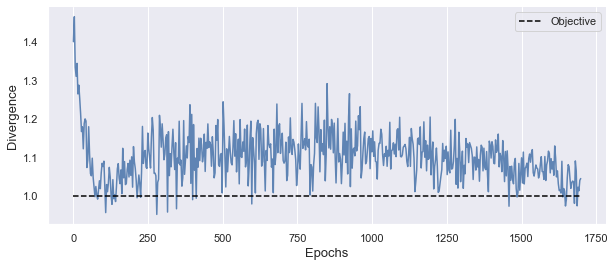

In [33]:
kld = np.load("../data/KLD_best_gan"+best_path+".npy")
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
rr = range(0,len(kld), 3)
short_kld = [kld[i] for i in rr]
plt.plot(rr, short_kld, color="#5F84B4")
plt.plot(rr,np.ones(len(short_kld)), color="black", ls="--", label="Objective");
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Divergence", fontsize=13)
plt.grid(axis="y")
plt.legend();


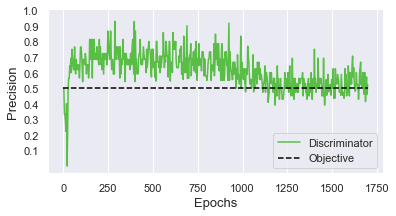

In [34]:
precision = np.load("../data/precision_best_gan"+best_path+".npy")
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
rr = range(0,len(precision), 3)
short_precision = [precision[i] for i in rr]
plt.plot(rr, short_precision, color="#59BE45", alpha=1, label="Discriminator");
plt.plot(rr,np.ones(len(short_precision))*.5,
         color="black", ls="--", label="Objective");
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Precision", fontsize=13)
plt.yticks(np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),
           np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))
plt.grid(axis="y")
plt.legend(loc="lower right");


In [35]:
best_path

'06_03_20_v1'

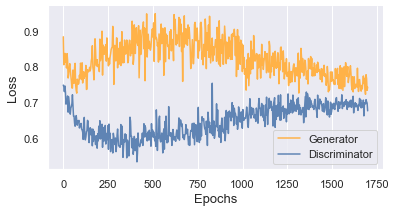

In [36]:
g_loss = np.load("../data/g_loss_best_gan"+best_path+".npy")
d_loss = np.load("../data/d_loss_best_gan"+best_path+".npy")
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
rr = range(0,len(precision), 3)
short_g_loss = [g_loss[i] for i in rr]
short_d_loss = [d_loss[i] for i in rr]
plt.plot(rr, short_g_loss, label="Generator", color="#FFB248")
plt.plot(rr, short_d_loss, label="Discriminator", color="#5F84B4")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Loss", fontsize=13)
plt.grid(axis="y")
plt.legend(loc="lower right");


In [37]:
X_train

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377
gyrA,1.000000,0.994874,-0.356674,1.000000,1.000000,0.909390,0.725292,0.567331,0.731382
recA,0.616219,0.599711,0.632131,-0.209725,-0.265305,-0.370792,1.000000,0.783242,1.000000
rpoB,-0.519856,0.926579,-0.380312,0.992837,0.985677,0.886011,-0.662111,0.593895,0.772322
rpoA,-0.052482,-0.033495,0.061149,-0.019001,-0.048531,-0.168233,-0.220635,1.000000,-0.227669


In [66]:
train_genes = np.random.choice(X_train.index, 14, replace=False)

In [47]:
def best_sample(generator, discriminator, n_synt, n_samples, noise_input):
    """
    return the best sample of the list the n_samples
    generated by the generator.
    """
    cv_dict = {}
    best_score = np.inf
    best_idx = np.inf
    for i in range(n_samples):
        x_pred = generator.predict(np.random.normal(0, 1, (n_synt, noise_input)))
        x_trans = obj.inverse_transform(x_pred)
        y_proba = D.predict_proba(x_pred)
        #coefficient of variation
        cv = np.median(np.std(x_trans, axis=1)/np.mean(x_trans, axis=1)) + np.mean((1-y_proba)/y_proba)
        #cv = abs(0.5 - np.mean(y_predict)) + 3*np.mean(y_proba/(1-y_proba))
        if cv < best_score:
            best_score = cv
            best_idx = i
        cv_dict[i] = (cv, x_pred)
    return cv_dict, best_idx

t_i = time()
dt_cv, best_idx = best_sample(G, D, 500, 1000, noise_input)
t_f = time()
print("time: ", (t_f-t_i)/60, "[min]")
print(dt_cv[best_idx][0], best_idx)

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


tempo de execuçฺão:  1.7385510245958964 [min]
1.169510851321627 946


# figure data+Gan data

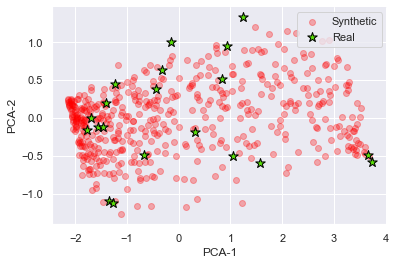

In [92]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot()
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

X_sint_pca = pca_real.transform(dt_cv[best_idx][1])

plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.scatter(X_sint_pca[:,0], X_sint_pca[:,1], color="red", label="Synthetic", alpha=.3, edgecolors="red")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color="#5ADE09", label="Real", alpha=1,
            marker="*", edgecolors="black", s=100)
plt.legend(loc="upper right");


In [67]:
train_genes

array(['secA', 'rho', 'recA', 'rpoA', 'rpoC', 'ftsZ', 'glnA', 'rrsA',
       'rpoD', 'ssrA', 'adk', 'gmk', 'hcaT', 'rpoB'], dtype=object)

In [68]:
test_genes = list(set(X_train.index) - set(train_genes))

# One Class SVM on main Data

In [90]:
from sklearn.svm import OneClassSVM
#nu=0.02
nu_val = 0.1
clf = OneClassSVM(kernel="linear", nu=nu_val, gamma="auto").fit(X_train.loc[train_genes]) #0.0138

print("train recall: ", recall_score(np.ones(len(train_genes)),
                                         clf.predict(X_train.loc[train_genes])))
print("test recall: ", recall_score(np.ones(len(test_genes)),
                                        clf.predict(X_train.loc[test_genes])))

values = np.linspace(0.01, 0.1, 200)
s = []
for i in values:
    clf = OneClassSVM(kernel="linear", nu=i, gamma="auto").fit(X_train.loc[train_genes]) #0.0138
    s.append(accuracy_score(np.ones(X_train.loc[test_genes].shape[0]),clf.predict(X_train.loc[test_genes])))

print(np.argmax(s))
print(values[np.argmax(s)])
##
#nu_val=np.linspace(0.001,0.9, 100)

#grid_params={'kernel':['linear', 'rbf'], 'nu':nu_val, 'gamma':[0.001,0.01,0.1,1,10]}
#gs = GridSearchCV(OneClassSVM(), grid_params,scoring="accuracy")
#gs_results=gs.fit(X_train.loc[train_genes],np.ones(len(train_genes)))
#gs_results.best_estimator_
#
#print("train recall: ", recall_score(np.ones(len(train_genes)),
#                                         gs_results.predict(X_train.loc[train_genes])))
#print("test recall: ", recall_score(np.ones(len(test_genes)),
#                                        gs_results.predict(X_train.loc[test_genes])))


train recall:  0.8571428571428571
test recall:  0.6666666666666666
0
0.01


# One Class SVM on GAN Data

train recall in the augmented data:  0.9883268482490273
train recall in the RG:  0.8571428571428571
test recall in the RG:  0.8333333333333334
All train recall in the RG  0.85
recall synthetic data only:  0.985
(776, 9)


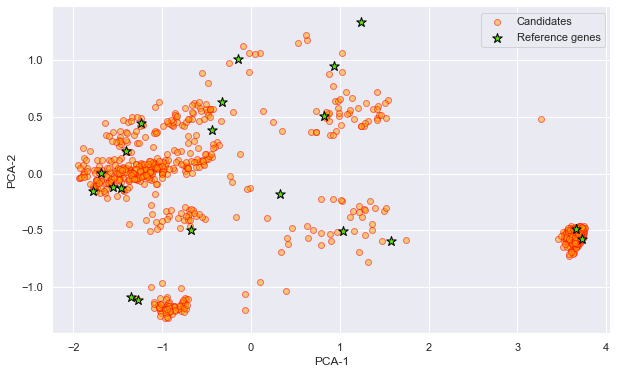

In [132]:
X_nov = np.concatenate((X_train.loc[train_genes], dt_cv[best_idx][1]))
X_nov.shape

from sklearn.svm import OneClassSVM
#nu=0.02
nu_val = 0.002
clf = OneClassSVM(kernel="rbf", nu=nu_val, gamma="auto").fit(X_nov) #0.0138

#nu_val=np.linspace(0.001,0.9, 100)

#grid_params={'kernel':['linear', 'rbf'], 'nu':nu_val, 'gamma':[0.001,0.01,0.1,1,10]}
#gs = GridSearchCV(OneClassSVM(), grid_params,scoring="accuracy")
#gs_results=gs.fit(X_nov,np.ones(X_nov.shape[0]))


print("train recall in the augmented data: ", recall_score(np.ones(X_nov.shape[0]), clf.predict(X_nov)))
print("train recall in the RG: ", recall_score(np.ones(len(train_genes)),clf.predict(X_train.loc[train_genes])))
print("test recall in the RG: ", recall_score(np.ones(len(test_genes)),clf.predict(X_train.loc[test_genes]) ))
print("All train recall in the RG ", recall_score(np.ones(X_train.shape[0]),clf.predict(X_train)))
print("recall synthetic data only: ", recall_score(np.ones(3000),
                                                         clf.predict(G.predict(np.random.normal(0, 1, (3000, noise_input))))))
predict_cand = clf.predict(X_cand)

cand = X_cand.loc[predict_cand == 1]
no_cand = X_cand.loc[predict_cand == -1]
cand.shape, no_cand.shape
X_nov_pca = pca_real.transform(X_nov)
X_cand_pca = pca_real.transform(cand)
X_nocand_pca = pca_real.transform(no_cand)
print(cand.shape)
fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot()
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
#plt.scatter(X_nocand_pca[:, 0], X_nocand_pca[:, 1], c='blue', s=30, edgecolors='k');
plt.scatter(X_cand_pca[:, 0], X_cand_pca[:, 1], c='orange', alpha=.5, edgecolors="red",
            label="Candidates");
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color="#5ADE09", label="Reference genes", alpha=1,
            marker="*", edgecolors="black", s=100)
plt.legend();


In [107]:
print(cand.shape)
print(no_cand.shape)
3392/4168

(776, 9)
(3392, 9)


0.8138195777351248

# change one class svm parameters

In [239]:
obj = scaler(-1,1)
obj.fit(X_rg)
X_train = obj.transform(X_rg)
X_nov = np.concatenate((X_train.loc[train_genes], dt_cv[best_idx][1]))
X_nov.shape

from sklearn.svm import OneClassSVM
#nu=0.02
nu_val = 0.002

clf = OneClassSVM(kernel="rbf", nu=nu_val, gamma="auto").fit(X_nov) #0.0138

#nu_val=np.linspace(0.001,0.9, 100)

#grid_params={'kernel':['linear', 'rbf'], 'nu':nu_val, 'gamma':[0.001,0.01,0.1,1,10]}
#gs = GridSearchCV(OneClassSVM(), grid_params,scoring="accuracy")
#gs_results=gs.fit(X_nov,np.ones(X_nov.shape[0]))


print("train recall in the augmented data: ", recall_score(np.ones(X_nov.shape[0]), clf.predict(X_nov)))
print("train recall in the RG: ", recall_score(np.ones(len(train_genes)),clf.predict(X_train.loc[train_genes])))
print("test recall in the RG: ", recall_score(np.ones(len(test_genes)),clf.predict(X_train.loc[test_genes]) ))
print("All train recall in the RG ", recall_score(np.ones(X_train.shape[0]),clf.predict(X_train)))
print("recall synthetic data only: ", recall_score(np.ones(3000),
                                                         clf.predict(G.predict(np.random.normal(0, 1, (3000, noise_input))))))
predict_cand = clf.predict(X_cand)

cand = X_cand.loc[predict_cand == 1]
no_cand = X_cand.loc[predict_cand == -1]

train recall in the augmented data:  0.9883268482490273
train recall in the RG:  0.8571428571428571
test recall in the RG:  0.8333333333333334
All train recall in the RG  0.85
recall synthetic data only:  0.987


# Parzen + GMM + linear classifier on GAN + main Data

In [108]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_nov)
kde_pred1=kde.score_samples(X_nov)
kde_pred1=np.exp(kde_pred1)
kde_pred1=kde_pred1.reshape(-1, 1)

kde_pred2=kde.score_samples(X_train.loc[train_genes])
kde_pred2=np.exp(kde_pred2)
kde_pred2=kde_pred1.reshape(-1, 1)

kde_pred3=kde.score_samples(X_train.loc[test_genes])
kde_pred3=np.exp(kde_pred3)
kde_pred3=kde_pred1.reshape(-1, 1)

pred_labels1=0
pred_labels2=0

arr0=kde_pred1
arr1=kde_pred2
arr2=kde_pred3

for i in range(arr0.shape[0]):
    if arr0[i]>5:
       pred_labels2=pred_labels2+1
    if arr0[i]<5:    
       pred_labels1=pred_labels1+1
    
recall2=(pred_labels1)/(pred_labels2+pred_labels1)*100
print('train recall in the augmented data',recall2)

pred_labels1=0
pred_labels2=0
for i in range(arr1.shape[0]):
    if arr1[i]>5:
       pred_labels2=pred_labels2+1
    if arr1[i]<5:    
       pred_labels1=pred_labels1+1

recall2=(pred_labels1)/(pred_labels2+pred_labels1)*100
print('train recall in the RG',recall2)

pred_labels1=0
pred_labels2=0
for i in range(arr2.shape[0]):
    if arr2[i]>5:
       pred_labels2=pred_labels2+1
    if arr2[i]<5:    
       pred_labels1=pred_labels1+1
    
recall2=(pred_labels1)/(pred_labels2+pred_labels1)*100
print('test recall in the RG',recall2)

bandwidth = np.arange(0.05, 2, .05)
bandwidths = 10 ** np.linspace(-1, 1, 100)

kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': bandwidths,
                     'kernel' : kernels},
                    verbose = 1,
                    cv = 10,
                     n_jobs = -1
                    )

grid_results_Normal=grid.fit(X_nov)
print(grid_results_Normal.best_params_)
gd=grid_results_Normal.score_samples(X_nov)
gd=np.exp(gd).reshape(-1,1)

pred_labels1=0
pred_labels2=0

arr0=gd
for i in range(arr0.shape[0]):
    if arr0[i]>5:
       pred_labels2=pred_labels2+1
    if arr0[i]<5:    
       pred_labels1=pred_labels1+1
    
recall2=(pred_labels1)/(pred_labels2+pred_labels1)*100
print(recall2)

train recall in the augmented data 71.98443579766537
train recall in the RG 71.98443579766537
test recall in the RG 71.98443579766537
Fitting 10 folds for each of 600 candidates, totalling 6000 fits
{'bandwidth': 0.17475284000076838, 'kernel': 'gaussian'}
59.53307392996109


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf  -100.32603374  -227.78025073
           -inf           -inf           -inf           -inf
  -108.93543789  -189.54981463           -inf           -inf
           -inf           -inf  -117.91486841  -168.38383166
           -inf           -inf           -inf           -inf
  -127.24705561  -147.52100809           -inf           -inf
           -inf           -inf  -136.91602944  -128.40978456
           -inf           -inf           -inf           -inf
  -146.90709052  -111.21934616           -inf           -inf
           -inf           -inf  -157.20677724   -97.38580201
           -inf           -inf           -inf           -inf
  -167.80282646   -86.42244253           -inf           -inf
           -inf           -inf  -178.68412552   -77.54038185
           -inf           -inf           -inf        

In [113]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X_nov)
labels = gm.predict(X_nov)
labels2 = gm.predict(X_train.loc[train_genes])
labels3 = gm.predict(X_train.loc[test_genes])

pred_labels1=0
pred_labels2=0

arr1=labels
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==0:    
       pred_labels2=pred_labels2+1
    
recall3=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the augmented data',recall3)

pred_labels1=0
pred_labels2=0

arr2=labels2
for i in range(arr2.shape[0]):
    if arr2[i]==1:
       pred_labels1=pred_labels1+1
    if arr2[i]==0:    
       pred_labels2=pred_labels2+1
    
recall3=(pred_labels1)/(pred_labels2+pred_labels1)*100
print('train recall in the RG data',recall3)   

pred_labels1=0
pred_labels2=0

arr3=labels3
for i in range(arr3.shape[0]):
    if arr3[i]==1:
       pred_labels1=pred_labels1+1
    if arr3[i]==0:    
       pred_labels2=pred_labels2+1
    
recall3=(pred_labels1)/(pred_labels2+pred_labels1)*100
print('test recall in the RG data',recall3) 

train recall in the augmented data 27.042801556420233
train recall in the RG data 28.57142857142857
test recall in the RG data 33.33333333333333


In [110]:
def Batch_LS(X_train, X_test, B, lr):
  Z = np.array(X_train)
  Z_T = Z.transpose()
  a = np.matmul(Z_T, Z)
  inv_a = np.linalg.inv(a)
  C = np.matmul(inv_a, Z_T)
  
  W_LS = np.matmul(C, B)
  D = np.dot(W_LS.transpose(), np.array(X_test).transpose())

  y_pred = []
  for i in range(D.shape[1]):
    if D[0,i]>0:
      y_pred.append(1)
    else:
      y_pred.append(0)

  return W_LS, y_pred

##test batch LS
X_train1=X_nov
X_test1=X_nov
X_test2=X_train.loc[train_genes]
X_test3=X_train.loc[test_genes]

lr = 0.001
B = np.zeros(shape=(X_train1.shape[0], 1)) + 0.001
W_LS, y_pred = Batch_LS(X_train1, X_test1, B, lr)

##
pred_labels1=y_pred.count(1)
pred_labels2=y_pred.count(0)

recall4=(pred_labels1)/(pred_labels2+pred_labels1)*100
recall4
print('train recall in the augmented data',recall4)

W_LS, y_pred2 = Batch_LS(X_train1, X_test2, B, lr)

##
pred_labels1=y_pred2.count(1)
pred_labels2=y_pred2.count(0)

recall4=(pred_labels1)/(pred_labels2+pred_labels1)*100
recall4
print('train recall in the RG data',recall4)


W_LS, y_pred3 = Batch_LS(X_train1, X_test3, B, lr)

##
pred_labels1=y_pred3.count(1)
pred_labels2=y_pred3.count(0)

recall4=(pred_labels1)/(pred_labels2+pred_labels1)*100
recall4
print('test recall in the RG data',recall4)



train recall in the augmented data 87.93774319066148
train recall in the RG data 78.57142857142857
test recall in the RG data 83.33333333333334


In [301]:
def seq_LS(data, b, num_iter, lr):
    x = data[:, :-1]
    y = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, x.shape[1])) + lr
    
    for epoch in range(num_iter):
      #sum_error = 0
      n = 0
      for i in range(x.shape[0]):
        a = np.dot(w, np.array(x[[i]]).transpose()) # array([[4.69173435]]) with shape (1, 1)
        #target = 1.0 if (a > 0) else -1
        #delta = (y[i] - target)
        #sum_error += delta**2
        #w += -lr* delta* (a[0,0] - b[i,0])* np.array(x.loc[[i]])

        if  (a < b[i,0]):
          w += -lr* (a[0,0] - b[i,0])* np.array(x[[i]])
          n = n + 1
        
      #if sum_error == 0:
        #print('epoch: ', epoch)
        #break
      print('>epoch=%d' % (epoch))
      print('n: ', n)

      if n == 0:
        print('last epoch: ', epoch)
        break

    return (w)

def test_seq_LS(data, w):
  x = data[:, :-1]
  y = data[:, -1]

  y_pred = np.empty(x.shape[0])

  for i in range(x.shape[0]):
    a = np.dot(w, np.array(x[[i]]).transpose())
    y_pred[i] = 1 if (a > 0) else -1

  return y_pred

##TEST SEQ LS

X_train2=X_nov
X_test2=X_nov

lr = 0.001
num_iter = 5
b = np.zeros(shape=(X_train2.shape[0], 1)) + lr
w = seq_LS(X_train2, b, num_iter, lr)
y_pred2 = test_seq_LS(X_test2, w)

##
pred_labels1=y_pred.count(1)
pred_labels2=y_pred.count(-1)

recall44=(pred_labels1)/(pred_labels2+pred_labels1)*100
recall44


>epoch=0
n:  193
>epoch=1
n:  207
>epoch=2
n:  258
>epoch=3
n:  384
>epoch=4
n:  490


100.0

In [114]:
def Widrow_Hoff(data, num_iter, lr, b):
    x = data[:, :-1]
    y = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(x.shape[1], 1))

    Z = np.array(x)
    Z_T = Z.transpose()
    A = np.matmul(Z_T, Z)

    for epoch in range(num_iter):
      print('epoch:', epoch)
      n = 0
      sum_error = 0
      w = w - lr* (np.matmul(A, w) - np.matmul(Z_T, b))
                   #Z_T* Z* w - Z_T* b

      for i in range(x.shape[0]):
        a = np.dot(np.array(x[[i]]), w)
        #print('a: ', a)
        #target = 1.0 if (a >= 0) else 0
        #delta = (y[i] - target)
        #sum_error += delta**2
        if (a < b[i,0]):
          b[i,0] = b[i,0] - lr* (- np.dot(Z[i], w) + b[i,0]) 
          n = n + 1
      #print('>epoch=%d, error=%.3f' % (epoch, sum_error))
      #print('b: ', b)
      #print('w: ', w)
      print('n: ', n)
      #if sum_error == 0:
        #print('last epoch: ', epoch)
        #break
      if n == 0:
        print('last epoch: ', epoch)
        break
    return w, b

##Test widrow hoff
X_train_W=X_nov
X_test_W=X_nov
X_test_W2=X_train.loc[train_genes]
X_test_W3=X_train.loc[test_genes]

lr = 0.001
num_iter = 10
b0 = np.zeros(shape=(X_train_W.shape[0], 1)) + 0.001
w, b = Widrow_Hoff(X_train_W, num_iter, lr, b0)
w = np.vstack([w, 0])
D = np.dot(w.transpose(), np.array(X_test_W).transpose())
y_pred = []
for i in range(D.shape[1]):
  if D[0,i]>0:
    y_pred.append(1)
  else:
    y_pred.append(-1)
    
pred_labels1=y_pred.count(1)
pred_labels2=y_pred.count(-1)

recall5=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the augmented data',recall5)

D = np.dot(w.transpose(), np.array(X_test_W2).transpose())
y_pred = []
for i in range(D.shape[1]):
  if D[0,i]>0:
    y_pred.append(1)
  else:
    y_pred.append(-1)
    
pred_labels1=y_pred.count(1)
pred_labels2=y_pred.count(-1)

recall5=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the RG data',recall5)


D = np.dot(w.transpose(), np.array(X_test_W3).transpose())
y_pred = []
for i in range(D.shape[1]):
  if D[0,i]>0:
    y_pred.append(1)
  else:
    y_pred.append(-1)
    
pred_labels1=y_pred.count(1)
pred_labels2=y_pred.count(-1)

recall5=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('test recall in the RG data',recall5)


epoch: 0
n:  489
epoch: 1
n:  514
epoch: 2
n:  514
epoch: 3
n:  514
epoch: 4
n:  514
epoch: 5
n:  514
epoch: 6
n:  513
epoch: 7
n:  514
epoch: 8
n:  510
epoch: 9
n:  507
train recall in the augmented data 78.98832684824903
train recall in the RG data 85.71428571428571
test recall in the RG data 66.66666666666666


In [115]:
def Gradient_Descent(data, num_iter, lr):
    x = data[:, :-1]
    y = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, x.shape[1])) + lr
    sigma_miss = np.zeros(shape=(1, x.shape[1]))

    for epoch in range(num_iter):
      
      #sum_error = 0
      w = w + sigma_miss
      a_list = []
      n = 0

      for i in range(x.shape[0]):
        a = np.dot(w, np.array(x[[i]]).transpose())
        a_list.append(a[0,0])
        #print('a:', a)
        #target = 1.0 if (a > 0) else -1
        #delta = (y[i] - target)
        #sum_error += delta**2

        #if delta!=0:  # if a<0 wont work, why not?
          #sigma_miss += (lr* np.array(x.loc[[i]])) # w is a row vector
          
        if  (a < 0):
          sigma_miss += (lr* np.array(x[[i]])) # w is a row vector
          n = n + 1
    
      print('>epoch=%d' % (epoch))
      print('sigma_miss: ', sigma_miss)
      print('n: ', n)

      if n == 0:
        print('last epoch: ', epoch)
        break

      #if sum_error == 0:
        #print('last epoch: ', epoch)
        #break

    df_a = pd.DataFrame(a_list)
    return w, df_a

def test_GD(data, w):
  x = data[:, :-1]
  y = data[:, -1]

  y_pred = np.empty(x.shape[0])

  for i in range(x.shape[0]):
    a = np.dot(w, np.array(x[[i]]).transpose())
    y_pred[i] = 1 if (a > 0) else -1

  return y_pred

##test GD(BATCH)
X_trainGD=X_nov
X_testGD1=X_train.loc[train_genes].values
X_testGD2=X_train.loc[test_genes].values

w, df_a = Gradient_Descent(X_trainGD, 5, 0.000001)
y_pred = test_GD(X_trainGD, w)
y_pred2 = test_GD(X_testGD1, w)
y_pred3 = test_GD(X_testGD2, w)
pred_labels1=0
pred_labels2=0

arr1=y_pred
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall6=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the augmented data',recall6)

pred_labels1=0
pred_labels2=0

arr1=y_pred2
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall6=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the RG data',recall6)

pred_labels1=0
pred_labels2=0

arr1=y_pred3
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall6=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('test recall in the RG data',recall6)


>epoch=0
sigma_miss:  [[-1.08605028e-04 -8.44242521e-05 -1.05902337e-04 -8.69127419e-05
  -9.21309801e-05 -9.24620717e-05 -4.79804258e-05 -2.10066393e-05]]
n:  163
>epoch=1
sigma_miss:  [[7.11932870e-05 1.73815055e-04 8.02206441e-05 1.64849056e-04
  1.52092323e-04 1.44206551e-04 1.61926496e-04 9.43232485e-05]]
n:  337
>epoch=2
sigma_miss:  [[-2.35627611e-05  8.87322028e-05 -1.27724295e-05  8.17073337e-05
   6.64039906e-05  5.61018163e-05  1.08561175e-04  6.45577842e-05]]
n:  139
>epoch=3
sigma_miss:  [[-1.21412261e-04  3.03787486e-06 -1.08942422e-04 -2.56063331e-06
  -2.24668113e-05 -3.30817893e-05  5.64191233e-05  3.60236048e-05]]
n:  144
>epoch=4
sigma_miss:  [[-2.04050640e-04 -7.56786495e-05 -1.92645265e-04 -7.85399013e-05
  -1.00117272e-04 -1.14126511e-04 -8.29033597e-07  8.89264091e-07]]
n:  124
train recall in the augmented data 75.87548638132296
train recall in the RG data 85.71428571428571
test recall in the RG data 66.66666666666666


In [116]:
def perceptron(data, num_iter, lr):
    x = data[:, :-1]
    y = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, x.shape[1])) + lr
  
    for epoch in range(num_iter):
      #sum_error = 0
      n = 0
      for i in range(x.shape[0]):
        a = np.dot(w, np.array(x[[i]]).transpose())
        #target = 1.0 if (a > 0) else -1
        #delta = (y[i] - target)
        #sum_error += delta**2
        
        #w += (lr* delta* np.array(x.loc[[i]]))

        if  (a < 0):
          w += (lr* np.array(x[[i]])) # w is a row vector
          n = n + 1
    
      print('>epoch=%d' % (epoch))
      print('n: ', n)

      if n == 0:
        print('last epoch: ', epoch)
        break

      #if sum_error == 0:
        #print('epoch: ', epoch)
        #break

    return (w)

def test_perceptron(data, w):
  x = data[:, :-1]
  y = data[:, -1]

  y_pred = np.empty(x.shape[0])
  a_list = []

  for i in range(x.shape[0]):
    a = np.dot(w, np.array(x[[i]]).transpose())
    a_list.append(a[0,0])
    y_pred[i] = 1 if (a > 0) else -1

  df_a = pd.DataFrame(a_list)
  return y_pred, df_a

## Test Perceptron
X_trainp=X_nov
X_testp1=X_train.loc[train_genes].values
X_testp2=X_train.loc[test_genes].values

w = perceptron(X_trainp, 5, 0.001)
y_pred, df_a= test_perceptron(X_trainp, w)
y_pred2, df_a= test_perceptron(X_testp1, w)
y_pred3, df_a= test_perceptron(X_testp2, w)

arr1=y_pred
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall7=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the augmented data',recall7)

arr1=y_pred2
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall7=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the RG data',recall7)

arr1=y_pred3
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall7=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the RG data',recall7)

>epoch=0
n:  140
>epoch=1
n:  108
>epoch=2
n:  107
>epoch=3
n:  103
>epoch=4
n:  104
train recall in the augmented data 88.65384615384615
train recall in the RG data 87.64044943820225
train recall in the RG data 87.5925925925926


# MLP classifier

Epoch 1/100
26/26 [==============================] - 1s 2ms/step - loss: 1.0639 - accuracy: 0.6155
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0334 - accuracy: 0.6314
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 1.0050 - accuracy: 0.6314
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.9781 - accuracy: 0.6314
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9531 - accuracy: 0.6314
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.9297 - accuracy: 0.6314
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.9075 - accuracy: 0.6314
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8869 - accuracy: 0.6314
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8682 - accuracy: 0.6314
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8508 - accuracy: 0.6314
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0572 - accuracy: 0.5012
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0281 - accuracy: 0.6143
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0017 - accuracy: 0.6695
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9768 - accuracy: 0.7076
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9520 - accuracy: 0.7248
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9277 - accuracy: 0.7482
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9033 - accuracy: 0.7629
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8801 - accuracy: 0.7654
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8570 - accuracy: 0.7629
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8349 - accuracy: 0.7482
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9566 - accuracy: 0.5418
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9129 - accuracy: 0.5467
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8753 - accuracy: 0.5602
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8417 - accuracy: 0.5688
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8118 - accuracy: 0.5688
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7843 - accuracy: 0.5725
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7590 - accuracy: 0.5737
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7357 - accuracy: 0.5762
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7139 - accuracy: 0.5774
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5835
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 0s 2ms/step - loss: 1.0795 - accuracy: 0.4853
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.9720 - accuracy: 0.4939
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.9175 - accuracy: 0.5074
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8821 - accuracy: 0.5688
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.5848
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8271 - accuracy: 0.6081
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8042 - accuracy: 0.6327
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7832 - accuracy: 0.6437
Epoch 9/100
26/26 [==============================] - 0s 922us/step - loss: 0.7644 - accuracy: 0.6413
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7465 - accuracy: 0.6548
Epoch 11/100
26/26 

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 1.1603 - accuracy: 0.2666
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0735 - accuracy: 0.3415
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0120 - accuracy: 0.4103
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9574 - accuracy: 0.4767
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9097 - accuracy: 0.5319
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8650 - accuracy: 0.5627
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8221 - accuracy: 0.5946
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7826 - accuracy: 0.6314
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7487 - accuracy: 0.6990
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7211 - accuracy: 0.7580
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 1.2933 - accuracy: 0.4656
Epoch 2/100
26/26 [==============================] - 0s 961us/step - loss: 1.1616 - accuracy: 0.5516
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0686 - accuracy: 0.6020
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0077 - accuracy: 0.6155
Epoch 5/100
26/26 [==============================] - 0s 798us/step - loss: 0.9654 - accuracy: 0.6192
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9335 - accuracy: 0.6229
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9080 - accuracy: 0.6265
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8867 - accuracy: 0.6278
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8668 - accuracy: 0.6302
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8484 - accuracy: 0.6327
Epoch

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 0s 2ms/step - loss: 1.0478 - accuracy: 0.3784
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9719 - accuracy: 0.4459
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9056 - accuracy: 0.4693
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8500 - accuracy: 0.4803
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8021 - accuracy: 0.4914
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7622 - accuracy: 0.5061
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7279 - accuracy: 0.5246
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.5283
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5405
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.5627
Epoch 11/100
26/26 [=

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 0s 1ms/step - loss: 1.3382 - accuracy: 0.1708
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 1.1573 - accuracy: 0.3636
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0499 - accuracy: 0.4251
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9719 - accuracy: 0.4877
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9105 - accuracy: 0.5430
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8575 - accuracy: 0.6032
Epoch 7/100
26/26 [==============================] - 0s 953us/step - loss: 0.8113 - accuracy: 0.6548
Epoch 8/100
26/26 [==============================] - 0s 988us/step - loss: 0.7709 - accuracy: 0.6953
Epoch 9/100
26/26 [==============================] - 0s 987us/step - loss: 0.7335 - accuracy: 0.7187
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.7568
Epoch 11/100
26

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 1s 1ms/step - loss: 1.5550 - accuracy: 0.0565
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 1.2834 - accuracy: 0.2494
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0911 - accuracy: 0.4226
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9668 - accuracy: 0.4816
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8899 - accuracy: 0.5799
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8388 - accuracy: 0.6376
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.7991 - accuracy: 0.6953
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7664 - accuracy: 0.7383
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7395 - accuracy: 0.7727
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7183 - accuracy: 0.7838
Epoch 11/100
26/26 [=

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 0s 1ms/step - loss: 1.2250 - accuracy: 0.4447
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 1.0604 - accuracy: 0.5135
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9540 - accuracy: 0.5430
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8797 - accuracy: 0.5467
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8225 - accuracy: 0.5614
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7754 - accuracy: 0.6093
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7365 - accuracy: 0.6646
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.7518
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.7826
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.7838
Epoch 11/100
26/26 [=

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 1s 1ms/step - loss: 1.0159 - accuracy: 0.3587
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8939 - accuracy: 0.4091
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8035 - accuracy: 0.5233
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7334 - accuracy: 0.6253
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.7346
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.8047
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.8059
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.8231
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.8378
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.8403
Epoch 11/100
26/26 [=

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 0s 1ms/step - loss: 1.2328 - accuracy: 0.3747
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 1.0021 - accuracy: 0.4251
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8721 - accuracy: 0.5037
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8027 - accuracy: 0.6351
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7606 - accuracy: 0.6953
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.7211
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.7518
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.7813
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.8022
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.7998
Epoch 11/100
26/26 [=

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 1.1938 - accuracy: 0.2592
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 1.0407 - accuracy: 0.3526
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.9397 - accuracy: 0.4742
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8638 - accuracy: 0.5319
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8032 - accuracy: 0.5725
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.7524 - accuracy: 0.5749
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.5885
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6192
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6241
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.6474
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 1.4497 - accuracy: 0.4595
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 1.1529 - accuracy: 0.6229
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9555 - accuracy: 0.6388
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8259 - accuracy: 0.6708
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7413 - accuracy: 0.6990
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.7125
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.7322
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.7531
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7568
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7789
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 0.9590 - accuracy: 0.4631
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8373 - accuracy: 0.5958
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.7456 - accuracy: 0.6929
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.7580
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.7580
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.8022
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.8047
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.8108
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.8366
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8329
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8842 - accuracy: 0.4951
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7724 - accuracy: 0.6327
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.7580
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.7432
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.8317
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.8219
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.8403
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.8354
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.8612
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.8403
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 1s 2ms/step - loss: 1.1553 - accuracy: 0.4447
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9864 - accuracy: 0.5430
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8590 - accuracy: 0.6400
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7603 - accuracy: 0.6781
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.7408
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.7285
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.7604
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5559 - accuracy: 0.7604
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.7813
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5110 - accuracy: 0.7998
Epoch 11/100
26/26 [=

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 0.8443 - accuracy: 0.4373
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.7429 - accuracy: 0.4963
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6265
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6855
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7150
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7285
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.7604
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7789
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7973
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7887
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 1.1165 - accuracy: 0.3796
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.9037 - accuracy: 0.5098
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.7707 - accuracy: 0.5909
Epoch 4/100
26/26 [==============================] - ETA: 0s - loss: 0.6770 - accuracy: 0.65 - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6744
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7617
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.8133
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.8378
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.8612
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5009 - accuracy: 0.8735
Epoch 10/100
26/26 [==============================] - 0s 1ms/step -

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 1.1948 - accuracy: 0.2248
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.9722 - accuracy: 0.5049
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.8342 - accuracy: 0.6057
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7455 - accuracy: 0.6622
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.7359
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6399 - accuracy: 0.7138
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.7543
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.7875
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.7998
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7936
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Text(0, 0.5, 'Fitness')

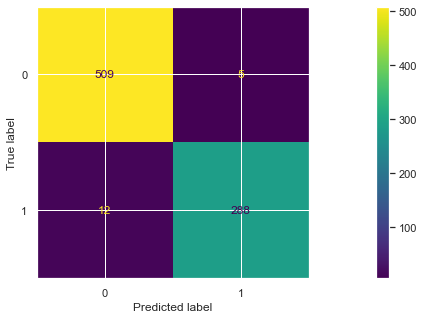

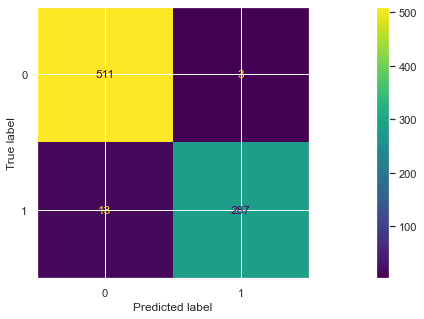

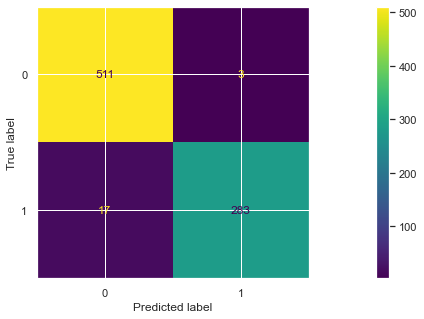

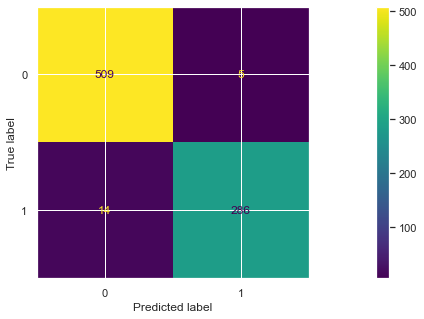

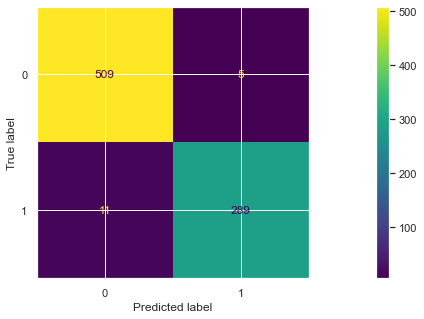

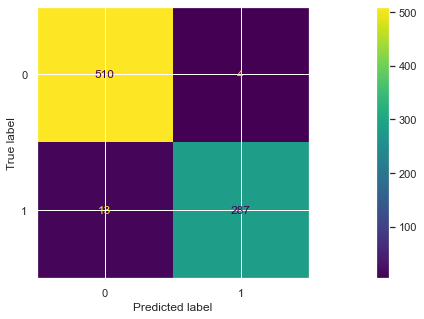

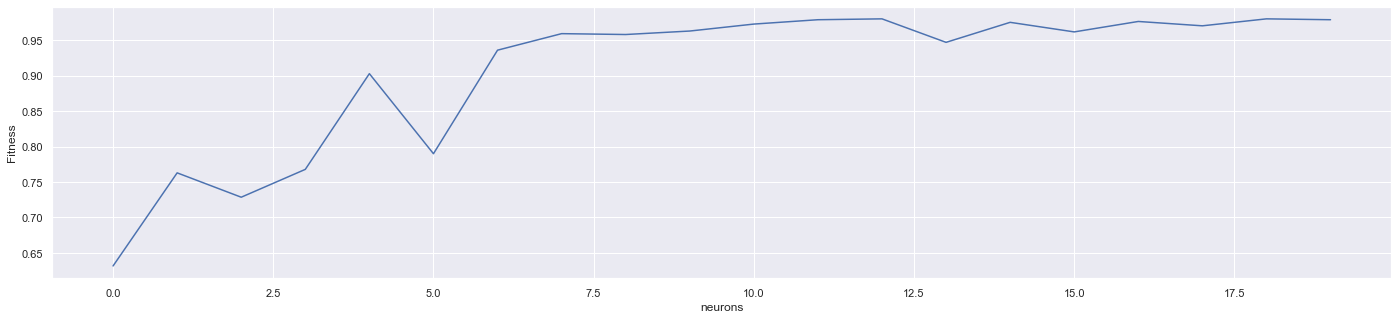

In [117]:
from tensorflow.keras import utils
from keras.utils import np_utils
from keras.utils import to_categorical
from tensorflow.keras import backend as K
##
sample_mean = mean(X_nov)
sample_std = std(X_nov)
mu1=sample_mean+0.2
mu2=sample_mean+0.3
mu3=sample_mean+0.6
mu4=sample_mean+0.7
mu5=sample_mean+0.8
mu6=sample_mean+0.9
sigma=sample_std
s1 = np.random.normal(mu1, sigma,size=(50, 9))
s2 = np.random.normal(mu2, sigma,size=(50, 9))
s3 = np.random.normal(mu3, sigma,size=(50, 9))
s4 = np.random.normal(mu4, sigma,size=(50, 9))
s5 = np.random.normal(mu5, sigma,size=(50, 9))
s6 = np.random.normal(mu6, sigma,size=(50, 9))

outlier=np.concatenate((s1,s2,s3,s4,s5,s6))

##
train =np.concatenate((X_nov, outlier))
test=train
y_train=np.concatenate((1*np.ones(X_nov.shape[0]),2*np.ones(outlier.shape[0])))
y_train=np_utils.to_categorical(y_train)
y_test=np.concatenate((1*np.ones(X_nov.shape[0]),2*np.ones(outlier.shape[0])))

score_fit2=[]

for x in range(1,21):

  model = Sequential()
  model.add(Dense(x, input_shape=(9,), activation='relu'))
  model.add(Dense(3, activation='softmax'))

# Configure the model and start training
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history=model.fit(train,y_train, epochs=100)
  d=history.history['accuracy']
  test_results1=model.predict_classes(test)
  conf1=confusion_matrix(y_test,test_results1)
  conf2=(conf1[0,0]+conf1[1,1])/814
  score_fit2.append(conf2)
  if score_fit2[x-1]>0.975:
   model2=model
   test_results=model2.predict_classes(test)
   conf=confusion_matrix(y_test,test_results)

   cm_display = ConfusionMatrixDisplay(conf).plot()

plt.figure()   
plt.plot(score_fit2)
plt.xlabel("neurons")
plt.ylabel("Accuracy") 

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_51 (Dense)             (None, 3)                 63        
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

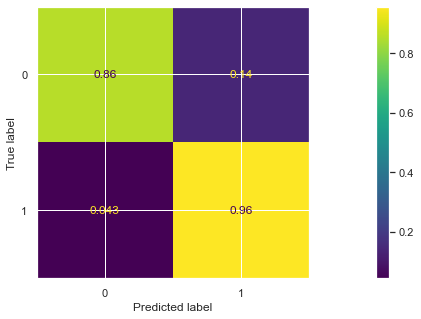

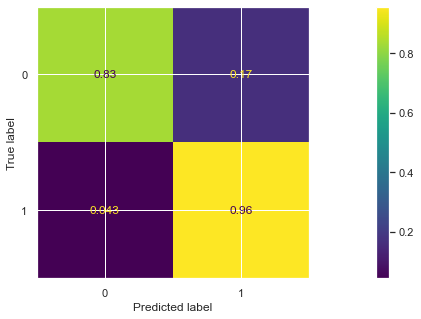

In [118]:
model2.summary()

y_train=np.concatenate((1*np.ones(len(train_genes)),2*np.ones(outlier.shape[0])))
y_test=np.concatenate((1*np.ones(len(test_genes)),2*np.ones(outlier.shape[0])))

train =np.concatenate((X_train.loc[train_genes], outlier))
test =np.concatenate((X_train.loc[test_genes], outlier))

test_results=model2.predict_classes(train)
conf=confusion_matrix(y_train,test_results,normalize='true')
cm_display = ConfusionMatrixDisplay(conf).plot()

test_results2=model2.predict_classes(test)
conf2=confusion_matrix(y_test,test_results2,normalize='true')
cm_display = ConfusionMatrixDisplay(conf2).plot()



In [119]:
#number of candidate in MLP

pred_labels1=0
pred_labels2=0
predict_cand1 = model2.predict_classes(X_cand)
p1=predict_cand1
for i in range(p1.shape[0]):
  if p1[i]==1:
       pred_labels1=pred_labels1+1
  if p1[i]==2:    
       pred_labels2=pred_labels2+1
    
pred_labels1

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3549

# RBF classifier

K-MEANS:  1
K-MEANS:  1
K-MEANS:  1
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
Accuracy:  0.6154791154791155
K-MEANS:  1
K-MEANS:  1
K-MEANS:  1
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
Accuracy:  0.7211302211302212
K-MEANS:  7
K-MEANS:  1
K-MEANS:  1
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
Accuracy:  0.812039312039312
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
Accuracy:  0.8783783783783784
K-MEANS:  10
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-ME

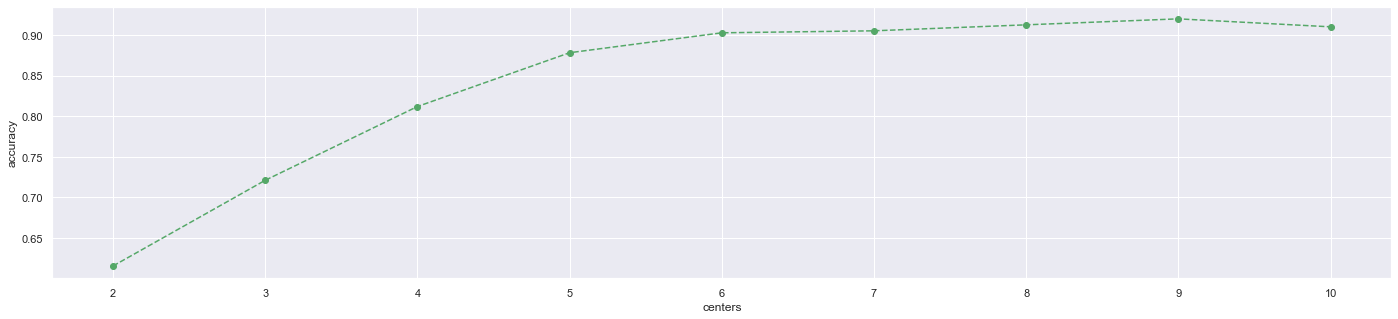

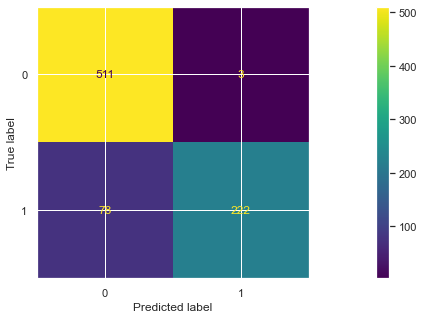

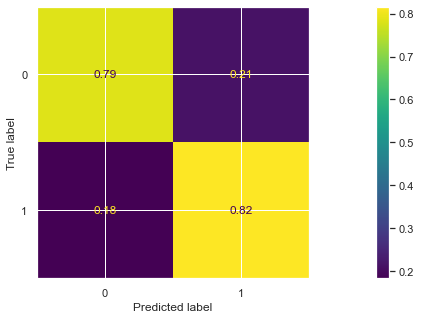

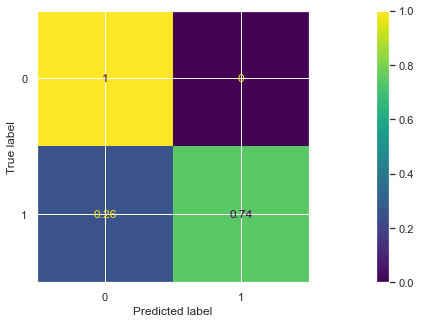

In [121]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# encode class values as integers
y_train=np.concatenate((1*np.ones(X_nov.shape[0]),2*np.ones(outlier.shape[0])))
y_test=np.concatenate((1*np.ones(X_nov.shape[0]),2*np.ones(outlier.shape[0])))
y_test2=np.concatenate((1*np.ones(X_train.loc[train_genes].shape[0]),2*np.ones(outlier.shape[0])))
y_test3=np.concatenate((1*np.ones(X_train.loc[test_genes].shape[0]),2*np.ones(outlier.shape[0])))

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)
encoded_y_test2 = encoder.transform(y_test2)
encoded_y_test3 = encoder.transform(y_test3)

X_train_rbf =np.concatenate((X_nov, outlier))
X_test_rbf=X_train_rbf
X_test_rbf2=np.concatenate((X_train.loc[train_genes], outlier))
X_test_rbf3=np.concatenate((X_train.loc[test_genes], outlier))

def get_distance(x1, x2):
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - x2[i]) ** 2
    return np.sqrt(sum)


def kmeans(X, k, max_iters):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    # centroids = [np.random.uniform(size=len(X[0])) for i in range(k)]

    converged = False
    current_iter = 0

    while (not converged) and (current_iter < max_iters):

        cluster_list = [[] for i in range(len(centroids))]

        for x in X:  # Go through each data point
            distances_list = []
            for c in centroids:
                distances_list.append(get_distance(c, x))
            cluster_list[int(np.argmin(distances_list))].append(x)

        cluster_list = list((filter(None, cluster_list)))

        prev_centroids = centroids.copy()

        centroids = []

        for j in range(len(cluster_list)):
            centroids.append(np.mean(cluster_list[j], axis=0))

        pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))

        print('K-MEANS: ', int(pattern))

        converged = (pattern == 0)

        current_iter += 1

    return np.array(centroids), [np.std(x) for x in cluster_list]


class RBF:

    def __init__(self, X, y, tX, ty, num_of_classes,
                 k, std_from_clusters=True):
        self.X = X
        self.y = y

        self.tX = tX
        self.ty = ty

        self.number_of_classes = num_of_classes
        self.k = k
        self.std_from_clusters = std_from_clusters

    def convert_to_one_hot(self, x, num_of_classes):
        arr = np.zeros((len(x), num_of_classes))
        for i in range(len(x)):
            c = int(x[i])
            arr[i][c] = 1
        return arr

    def get_rbf(self, x, c, s):
        distance = get_distance(x, c)
        return 1 / np.exp(-distance / s ** 2)

    def get_rbf_as_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.get_rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)

    def fit(self):

        self.centroids, self.std_list = kmeans(self.X, self.k, 1000)

        if not self.std_from_clusters:
            dMax = np.max([get_distance(c1, c2) for c1 in self.centroids for c2 in self.centroids])
            self.std_list = np.repeat(dMax / np.sqrt(2 * self.k), self.k)

        RBF_X = self.get_rbf_as_list(self.X, self.centroids, self.std_list)

        self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.convert_to_one_hot(self.y, self.number_of_classes)

        RBF_list_tst = self.get_rbf_as_list(self.tX, self.centroids, self.std_list)

        self.pred_ty = RBF_list_tst @ self.w

        self.pred_ty = np.array([np.argmax(x) for x in self.pred_ty])

        diff = self.pred_ty - self.ty

        accuracy = len(np.where(diff == 0)[0]) / len(diff)
        print('Accuracy: ', accuracy)
        
        return self.pred_ty, accuracy, self.centroids
    
n_centers=[k+2 for k in range(9)]
accuracy = np.empty(len(n_centers))
score=[]
for k in range(9):
  RBF_CLASSIFIER = RBF(X_train_rbf, encoded_y_train, X_test_rbf, encoded_y_test, num_of_classes=2,
                     k=k+2, std_from_clusters=False)
   
  y_pred, accuracy[k],centroids = RBF_CLASSIFIER.fit()
  score.append(accuracy[k])
  if score[k]>0.92:
    k1=k
#    conf=confusion_matrix(encoded_y_test, y_pred)
#    cm_display = ConfusionMatrixDisplay(conf).plot()

plt.figure()       
plt.plot(n_centers, accuracy, 'go--')
plt.xlabel("centers")
plt.ylabel("accuracy") 
##
RBF_CLASSIFIER = RBF(X_train_rbf, encoded_y_train, X_test_rbf, encoded_y_test, num_of_classes=2,
                     k=k1, std_from_clusters=False)

y_pred, accuracy, centroids = RBF_CLASSIFIER.fit()

centroids
conf=confusion_matrix(encoded_y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf).plot()
##
RBF_CLASSIFIER = RBF(X_train_rbf, encoded_y_train, X_test_rbf2, encoded_y_test2, num_of_classes=2,
                     k=k1, std_from_clusters=False)

y_pred, accuracy, centroids = RBF_CLASSIFIER.fit()

centroids
conf=confusion_matrix(encoded_y_test2, y_pred,normalize='true')
cm_display = ConfusionMatrixDisplay(conf).plot()
##
RBF_CLASSIFIER = RBF(X_train_rbf, encoded_y_train, X_test_rbf3, encoded_y_test3, num_of_classes=2,
                     k=k1, std_from_clusters=False)

y_pred, accuracy, centroids = RBF_CLASSIFIER.fit()

centroids
conf=confusion_matrix(encoded_y_test3, y_pred,normalize='true')
cm_display = ConfusionMatrixDisplay(conf).plot()


In [122]:
print(k1)
encoded_y_cand=np.concatenate((1*np.ones(X_cand.shape[0]),2*np.ones(outlier.shape[0])))
encoded_y_cand= encoder.transform(encoded_y_cand)
X_candd=np.concatenate((X_cand, outlier))
RBF_CLASSIFIER = RBF(X_train_rbf, encoded_y_train, X_candd, encoded_y_cand, num_of_classes=2,
                     k=k1, std_from_clusters=False)

y_pred, accuracy, centroids = RBF_CLASSIFIER.fit()

confusion_matrix(encoded_y_cand, y_pred)  ##satr aval:number of candidate in RBF 


7
K-MEANS:  9
K-MEANS:  3
K-MEANS:  2
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
Accuracy:  0.795658012533572


array([[3336,  832],
       [  81,  219]], dtype=int64)

# One class svm on new data

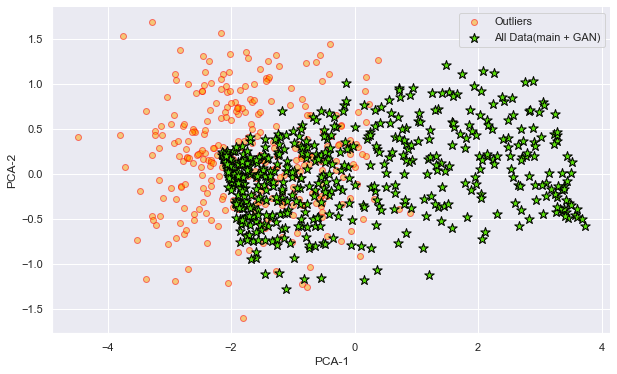

In [123]:
X_nov_pca = pca_real.transform(X_nov)
X_outlier_pca = pca_real.transform(outlier)

fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot()
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.scatter(X_outlier_pca[:, 0], X_outlier_pca[:, 1], c='orange', alpha=.5, edgecolors="red",
            label="Outliers");
plt.scatter(X_nov_pca[:,0], X_nov_pca[:,1], color="#5ADE09", label="All Data(main + GAN)", alpha=1,
            marker="*", edgecolors="black", s=100)
plt.legend();

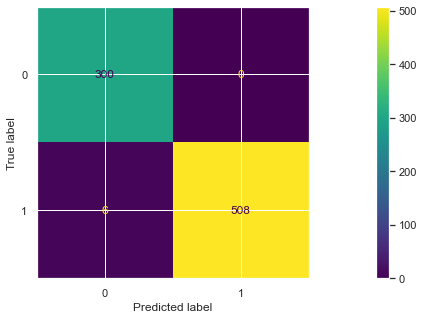

In [134]:
# one class SVM on new data
clf
testsvm =np.concatenate((X_nov, outlier))

y_test=np.concatenate((1*np.ones(X_nov.shape[0]),-1*np.ones(outlier.shape[0])))

y_pred=clf.predict(testsvm)

conf=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf).plot()

In [135]:
X_nov.shape

(514, 9)

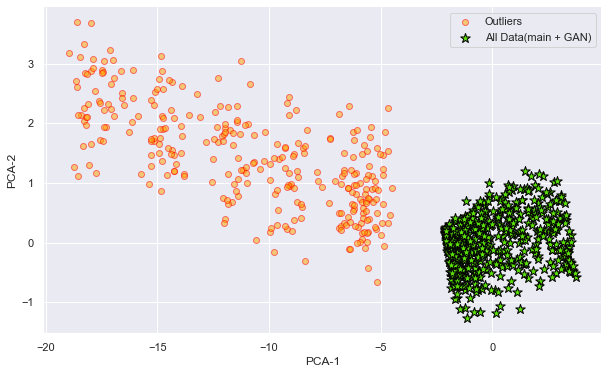

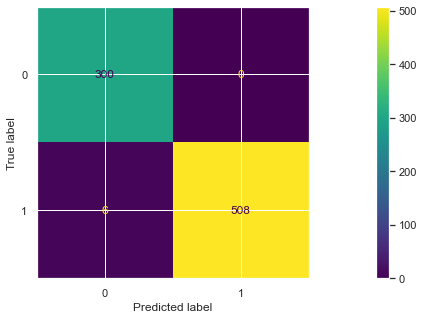

In [136]:
mu1=sample_mean+2
mu2=sample_mean+2
mu3=sample_mean+3
mu4=sample_mean+4
mu5=sample_mean+5
mu6=sample_mean+6
sigma=sample_std
s1 = np.random.normal(mu1, sigma,size=(50, 9))
s2 = np.random.normal(mu2, sigma,size=(50, 9))
s3 = np.random.normal(mu3, sigma,size=(50, 9))
s4 = np.random.normal(mu4, sigma,size=(50, 9))
s5 = np.random.normal(mu5, sigma,size=(50, 9))
s6 = np.random.normal(mu6, sigma,size=(50, 9))

outlier=np.concatenate((s1,s2,s3,s4,s5,s6))

X_nov_pca = pca_real.transform(X_nov)
X_outlier_pca = pca_real.transform(outlier)

fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot()
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.scatter(X_outlier_pca[:, 0], X_outlier_pca[:, 1], c='orange', alpha=.5, edgecolors="red",
            label="Outliers");
plt.scatter(X_nov_pca[:,0], X_nov_pca[:,1], color="#5ADE09", label="All Data(main + GAN)", alpha=1,
            marker="*", edgecolors="black", s=100)
plt.legend();

testsvm =np.concatenate((X_nov, outlier))

y_test=np.concatenate((1*np.ones(X_nov.shape[0]),-1*np.ones(outlier.shape[0])))

y_pred=clf.predict(testsvm)

conf=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf).plot()   ##natije=be ezaye nu=0.2 ba rbf, one class svm javab mide!

### Selection the best number of synthetic genes

In [196]:
noise_input

50

In [33]:
from sklearn.svm import OneClassSVM
percentages = np.arange(start=.25, stop = 20, step=.25)
d_per = {}
for p in percentages:
    tic = time()
    dt_cv, best_idx = best_sample(G, D, int(p*X_train.shape[0]), 1000, noise_input)
    X_augmented = np.concatenate((X_train[:14], dt_cv[best_idx][1]))
    best_score = 0
    for nu in np.linspace(0.01, 0.2, 200):
        clf = OneClassSVM(kernel="rbf", nu=nu, gamma="auto").fit(X_augmented)
        train_accuracy = accuracy_score(np.ones(X_augmented.shape[0]), clf.predict(X_augmented))
        test_accuracy = accuracy_score(np.ones(X_train[14:].shape[0]), clf.predict(X_train[14:]))
        if (((train_accuracy + test_accuracy)*.5) - abs(train_accuracy - test_accuracy)) > best_score:
          best_nu = nu
          best_score = (((train_accuracy + test_accuracy)*.5) - abs(train_accuracy - test_accuracy))
    clf = OneClassSVM(kernel="rbf", nu=best_nu, gamma="auto").fit(X_augmented)
    train_accuracy = accuracy_score(np.ones(X_augmented.shape[0]), clf.predict(X_augmented))
    test_accuracy = accuracy_score(np.ones(X_train[14:].shape[0]), clf.predict(X_train[14:]))
    d_per[p] = [dt_cv[best_idx][0], dt_cv[best_idx][1], best_nu, train_accuracy, test_accuracy]
    toc = time()
    print("[{}/{}] | time: {} [min]".format(p, len(percentages), (toc-tic)/60))

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[0.25/79] | time: 1.4043937881787618 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[0.5/79] | time: 1.3764724135398865 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[0.75/79] | time: 1.3797476689020793 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[1.0/79] | time: 1.3619389613469441 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[1.25/79] | time: 1.3227701783180237 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[1.5/79] | time: 1.3897925933202109 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[1.75/79] | time: 1.5038530826568604 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[2.0/79] | time: 1.4725376526514689 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[2.25/79] | time: 1.3642927209536235 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[2.5/79] | time: 1.368927037715912 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[2.75/79] | time: 1.297449564933777 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[3.0/79] | time: 1.33003675142924 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[3.25/79] | time: 1.3642890373865764 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[3.5/79] | time: 1.5266030311584473 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[3.75/79] | time: 1.5332348148028057 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[4.0/79] | time: 1.480740737915039 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[4.25/79] | time: 1.529455018043518 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[4.5/79] | time: 1.6158029198646546 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[4.75/79] | time: 1.570709772904714 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[5.0/79] | time: 1.446161929766337 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[5.25/79] | time: 1.403609613577525 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[5.5/79] | time: 1.4378126462300618 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[5.75/79] | time: 1.4642728368441265 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[6.0/79] | time: 1.4894256869951883 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[6.25/79] | time: 1.5903169949849447 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[6.5/79] | time: 1.4306543072064717 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[6.75/79] | time: 1.491884716351827 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[7.0/79] | time: 1.4469256083170572 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[7.25/79] | time: 1.4750660220781961 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[7.5/79] | time: 1.4531638264656066 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[7.75/79] | time: 1.4693165143330893 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[8.0/79] | time: 1.3454707543055215 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[8.25/79] | time: 1.4853654026985168 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[8.5/79] | time: 1.5387356599171957 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[8.75/79] | time: 1.4450377583503724 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[9.0/79] | time: 1.4604287028312684 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[9.25/79] | time: 1.4459789037704467 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[9.5/79] | time: 1.454120695590973 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[9.75/79] | time: 1.4631348292032877 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[10.0/79] | time: 1.4773549079895019 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[10.25/79] | time: 1.4584006190299987 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[10.5/79] | time: 1.470828402042389 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[10.75/79] | time: 1.525797931353251 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[11.0/79] | time: 1.656007134914398 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[11.25/79] | time: 1.7402576287587483 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[11.5/79] | time: 1.6265650232632956 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[11.75/79] | time: 1.6859843850135803 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[12.0/79] | time: 1.5861056725184122 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[12.25/79] | time: 1.5969042579332988 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[12.5/79] | time: 1.598958146572113 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[12.75/79] | time: 1.5704150636990866 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[13.0/79] | time: 1.7076498985290527 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[13.25/79] | time: 1.648357343673706 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[13.5/79] | time: 1.56786048412323 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[13.75/79] | time: 1.544046370188395 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[14.0/79] | time: 1.560856024424235 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[14.25/79] | time: 1.6304736057917277 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[14.5/79] | time: 1.6439645171165467 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[14.75/79] | time: 1.613953959941864 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[15.0/79] | time: 1.54902956088384 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[15.25/79] | time: 1.56587419907252 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[15.5/79] | time: 1.5950482487678528 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[15.75/79] | time: 1.601419949531555 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[16.0/79] | time: 1.5699816346168518 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[16.25/79] | time: 1.6184517979621886 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[16.5/79] | time: 1.6669955253601074 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[16.75/79] | time: 1.5555628101030985 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[17.0/79] | time: 1.5572568456331888 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[17.25/79] | time: 1.759184992313385 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[17.5/79] | time: 1.55187699397405 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[17.75/79] | time: 1.5709539731343587 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[18.0/79] | time: 1.5711778004964192 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[18.25/79] | time: 1.5727981289227804 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[18.5/79] | time: 1.572839903831482 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[18.75/79] | time: 1.5666328231493631 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[19.0/79] | time: 1.5684451500574748 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[19.25/79] | time: 1.5862197081247966 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[19.5/79] | time: 1.583122714360555 [min]


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[19.75/79] | time: 1.5857386668523152 [min]


### Precision
- Precision in train and test based on the percentage of augmented data

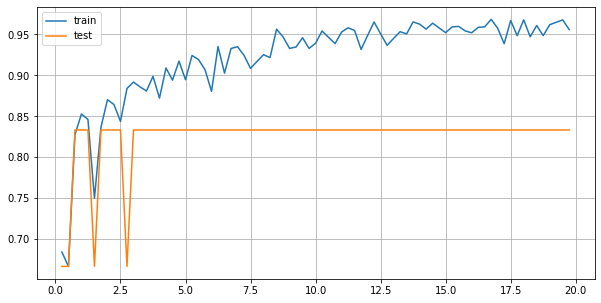

In [34]:
train_score = [i[3] for i in d_per.values()]
test_score = [i[4] for i in d_per.values()]
plt.figure(figsize=(10,5))
plt.plot(percentages, train_score, label="train")
plt.plot(percentages, test_score, label="test")
plt.grid()
plt.legend();

In [197]:
1 - cand.shape[0]/X_cand.shape[0]

0.8102207293666027

## Candidates

In [198]:
cand = pd.read_csv("../data/ICCSA_cantidates_06_03_20_v1.csv", index_col=0)
cand.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,-1.021960,-0.979435,-1.070980,-0.936075,-0.964250,-1.031994,-0.934337,-0.939543,-0.937269
aas,-0.922192,-0.918634,-0.912901,-0.955073,-0.996782,-0.974946,-0.973578,-0.897515,-0.892211
accB,-0.514109,0.918962,1.020704,0.785425,0.781750,0.679621,0.702075,0.594880,0.713118
aceB,0.857671,0.777676,0.822172,0.077504,0.069610,-0.091237,-0.130144,1.031624,-0.112132
aceE,0.966515,0.934333,1.030230,0.849922,0.855701,0.749005,0.780537,0.621839,0.832078


(791, 9)


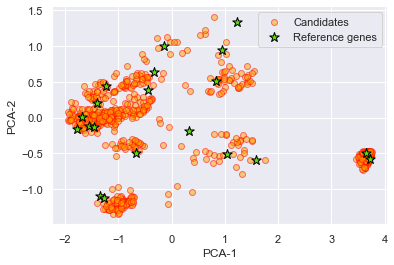

In [199]:
X_nov_pca = pca_real.transform(X_nov)
X_cand_pca = pca_real.transform(cand)
print(cand.shape)
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot()
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
#plt.scatter(X_nocand_pca[:, 0], X_nocand_pca[:, 1], c='blue', s=30, edgecolors='k');
plt.scatter(X_cand_pca[:, 0], X_cand_pca[:, 1], c='orange', alpha=.5, edgecolors="red",
            label="Candidates");
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color="#5ADE09", label="Reference genes", alpha=1,
            marker="*", edgecolors="black", s=100)
plt.legend();
#plt.savefig("./drive/My Drive/Colab Notebooks/data/images/candidates"+best_path+".svg")

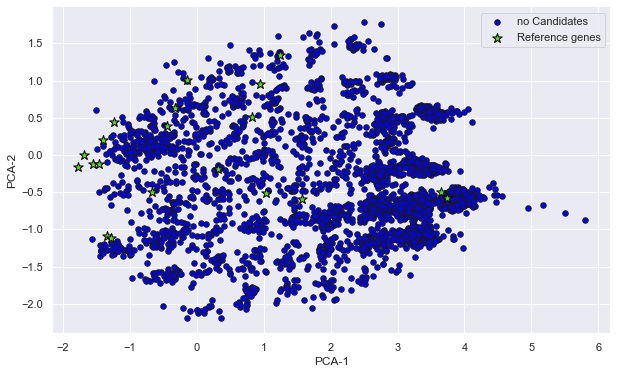

In [200]:
fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot()
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.scatter(X_nocand_pca[:, 0], X_nocand_pca[:, 1], c='blue',label="no Candidates", s=30, edgecolors='k');
#plt.scatter(X_cand_pca[:, 0], X_cand_pca[:, 1], c='orange', alpha=.5, edgecolors="red",
#            label="Candidates");
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color="#5ADE09", label="Reference genes", alpha=1,
            marker="*", edgecolors="black", s=100)
plt.legend();

# PCA

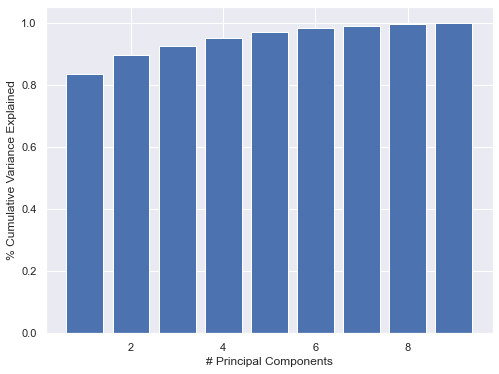

In [138]:
pca = PCA()
pca.fit(X_nov)
X_pca = pca.transform(X_nov)

cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,10), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [139]:
cum_exp_var

[0.8349965550183177,
 0.8965215595982235,
 0.9237006499422529,
 0.9490532014412861,
 0.9702270180522997,
 0.9827455323638945,
 0.9894493304504749,
 0.9953476898774224,
 0.9999999999999999]

In [140]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_nov)
principalDf = pd.DataFrame(data = principalComponents)
           
#principalDf['target'] = y
principalDf


,0,1,2
0,-0.712041,-0.184864,-1.090156
1,-0.025896,-0.790969,0.604331
2,-0.277696,-0.741341,-0.317554
3,0.848997,-0.678386,-0.163115
4,-1.802117,-0.051969,-0.185360
...,...,...,...
509,-1.895053,-0.146632,-0.011257
510,-1.739682,-0.411787,-0.020646
511,-0.864424,-0.310357,0.391690
512,-0.488469,-0.527458,-0.046561


In [141]:
pca.n_components_


3

In [143]:
X_nov_3=principalComponents

#nu=0.02
nu_val = 0.002
clf = OneClassSVM(kernel="rbf", nu=nu_val, gamma="auto").fit(X_nov_3) #0.0138
X_trainn=X_train.loc[train_genes]
X_testt=X_train.loc[test_genes]
X_train_3=pca.fit_transform(X_trainn)
X_test_3=pca.fit_transform(X_testt)

             

print("train accuracy in the augmented data: ", accuracy_score(np.ones(X_nov.shape[0]), clf.predict(X_nov_3)))
print("train accuracy in the RG: ", accuracy_score(np.ones(len(train_genes)),clf.predict(X_train_3)))
print("test accuracy in the RG: ", accuracy_score(np.ones(len(test_genes)),clf.predict(X_test_3)))

train accuracy in the augmented data:  0.9824902723735408
train accuracy in the RG:  0.7142857142857143
test accuracy in the RG:  0.5


# Autoencoder

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/500
3/3 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.0350
Epoch 2/500
3/3 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.0350
Epoch 3/500
3/3 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.0350
Epoch 4/500
3/3 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.0350
Epoch 5/500
3/3 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.0350
Epoch 6/500
3/3 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.0350
Epoch 7/500
3/3 [==============================] - 0s 996us/step - loss: 0.4842 - accuracy: 0.0350
Epoch 8/500
3/3 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.0350
Epoch 9/500
3/3 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.0350
Epoch 10/500
3/3 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.0350
Epoch 11/500
3/3 [=========

Text(0, 0.5, 'loss')

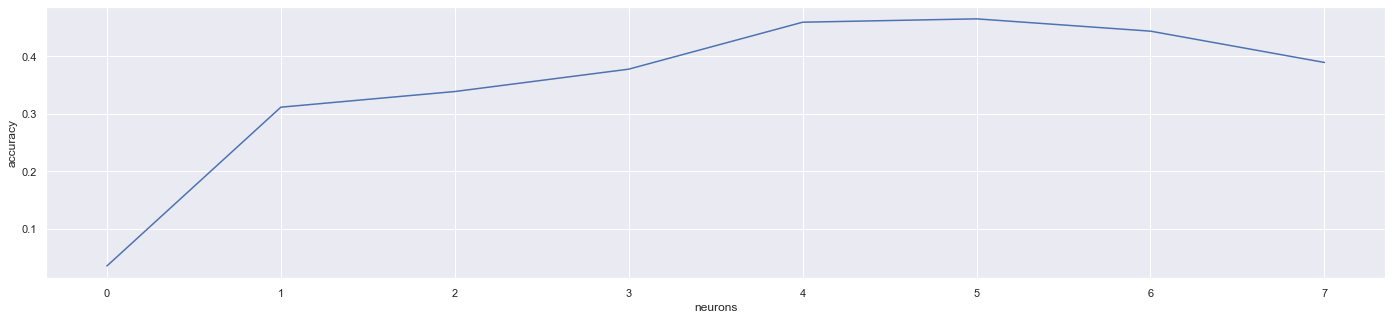

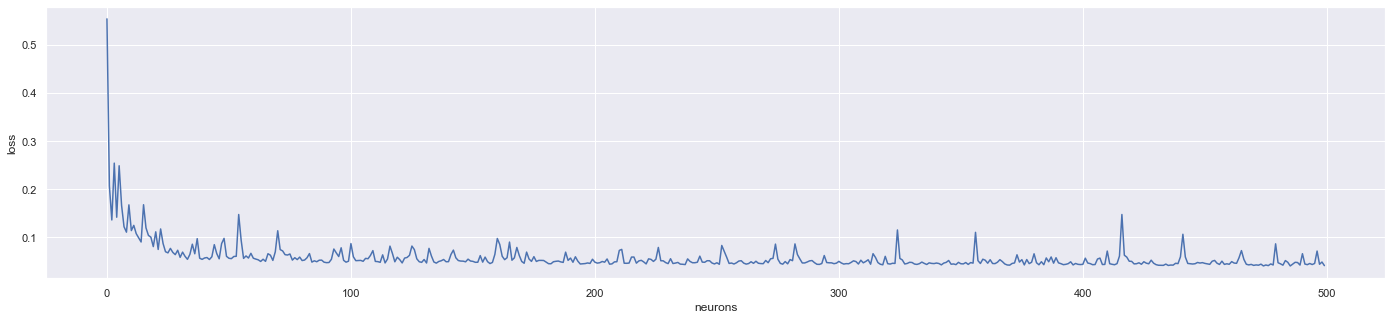

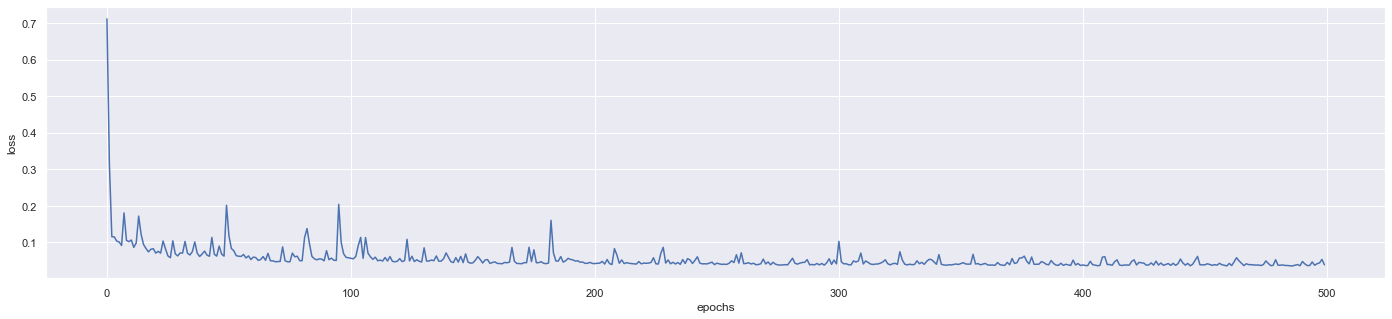

In [224]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import utils
from keras.utils import np_utils
from keras.utils import to_categorical
from tensorflow.keras import backend as K
obj = scaler(-1,1)
obj.fit(X_rg)
X_train = obj.transform(X_rg)
X_nov = np.concatenate((X_train.loc[train_genes], dt_cv[best_idx][1]))
#%% Non linear PCA
score_fit=[]
score_fit2=[]
losss=[]

# Encoder structure
for x in range(0,8):
  inputx =  keras.Input(shape=(9,))
  encoded = layers.Dense(x, activation='tanh')(inputx)
#  encoded = layers.Dense(7, activation='tanh')(encoded)

  encoded = layers.Dense(3, activation='tanh')(encoded)
    
#  decoded = layers.Dense(7, activation='tanh')(encoded)
  decoded = layers.Dense(x, activation='tanh')(encoded)
  decoded = layers.Dense(9, activation='tanh')(decoded)
  autoencoder = keras.Model(inputx, decoded)
  autoencoder2 = keras.Model(inputx, decoded)
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  autoencoder.compile(loss=keras.losses.mean_squared_error,
             optimizer=keras.optimizers.Adagrad(lr=0.7),
             metrics = ['accuracy'])
  history=autoencoder.fit(X_nov,X_nov,
                epochs=500,
                batch_size=256)
  d=history.history['accuracy']
  d1=history.history['loss']

  score_fit.append(d[499])
  score_fit2.append(d1[499])

  if score_fit[x]>0.45:
   autoencoder2=autoencoder
   encoder1 = keras.Model(inputx, encoded)
   losss=d1
    
plt.figure(1)  
plt.plot(score_fit)
plt.xlabel("neurons")
plt.ylabel("accuracy")

plt.figure(2)  
plt.plot(d1)
plt.xlabel("neurons")
plt.ylabel("loss")

plt.figure(3)  
plt.plot(losss)
plt.xlabel("epochs")
plt.ylabel("loss")
#autoencoder.summary()

In [260]:
obj = scaler(-1,1)
obj.fit(X_rg)
X_train = obj.transform(X_rg)
X_nov = np.concatenate((X_train.loc[train_genes], dt_cv[best_idx][1]))
autoencoder2.summary()
X_nov_ae=encoder1.predict(X_nov)
X_nov_ae

Model: "model_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_65 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_368 (Dense)            (None, 7)                 70        
_________________________________________________________________
dense_369 (Dense)            (None, 3)                 24        
_________________________________________________________________
dense_370 (Dense)            (None, 7)                 28        
_________________________________________________________________
dense_371 (Dense)            (None, 9)                 72        
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


array([[ 0.079188  ,  0.4925405 , -0.318573  ],
       [ 0.788129  , -0.06922998,  0.5232369 ],
       [ 0.83980113,  0.15816768,  0.1833116 ],
       ...,
       [-0.03200412,  0.485999  , -0.27299696],
       [ 0.14097826,  0.43333077, -0.02416139],
       [ 0.19521052,  0.19024648, -0.12446063]], dtype=float32)

In [261]:
#nu=0.02
nu_val = 0.002
clf = OneClassSVM(kernel="rbf", nu=nu_val, gamma="auto").fit(X_nov_ae) #0.0138
X_trainn=X_train.loc[train_genes]
X_testt=X_train.loc[test_genes]
X_train_ae=encoder1.predict(X_trainn)
X_test_ae=encoder1.predict(X_testt)

             

print("train accuracy in the augmented data: ", accuracy_score(np.ones(X_nov.shape[0]), clf.predict(X_nov_ae)))
print("train accuracy in the RG: ", accuracy_score(np.ones(len(train_genes)),clf.predict(X_train_ae)))
print("test accuracy in the RG: ", accuracy_score(np.ones(len(test_genes)),clf.predict(X_test_ae)))

train accuracy in the augmented data:  0.9922178988326849
train accuracy in the RG:  0.9285714285714286
test accuracy in the RG:  0.8333333333333334


In [227]:
X_canddd=encoder1.predict(X_cand)
predict_cand = clf.predict(X_canddd)

cand = X_canddd[predict_cand == 1]
no_cand = X_canddd[predict_cand == -1]
print(cand.shape)
print(no_cand.shape)

(3034, 3)
(1134, 3)


In [228]:
X_cand.shape

(4168, 9)

# Parzen + GMM + linear classifier on GAN + main Data(autoencoder data)

In [264]:
X_nov=X_nov_ae
X_train=X_train_ae
X_test=X_test_ae

In [230]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_nov)
kde_pred1=kde.score_samples(X_nov)
kde_pred1=np.exp(kde_pred1)
kde_pred1=kde_pred1.reshape(-1, 1)

kde_pred2=kde.score_samples(X_train)
kde_pred2=np.exp(kde_pred2)
kde_pred2=kde_pred1.reshape(-1, 1)

kde_pred3=kde.score_samples(X_test)
kde_pred3=np.exp(kde_pred3)
kde_pred3=kde_pred1.reshape(-1, 1)

pred_labels1=0
pred_labels2=0

arr0=kde_pred1
arr1=kde_pred2
arr2=kde_pred3

for i in range(arr0.shape[0]):
    if arr0[i]>5:
       pred_labels2=pred_labels2+1
    if arr0[i]<5:    
       pred_labels1=pred_labels1+1
    
recall2=(pred_labels1)/(pred_labels2+pred_labels1)*100
print('train recall in the augmented data',recall2)

pred_labels1=0
pred_labels2=0
for i in range(arr1.shape[0]):
    if arr1[i]>5:
       pred_labels2=pred_labels2+1
    if arr1[i]<5:    
       pred_labels1=pred_labels1+1

recall2=(pred_labels1)/(pred_labels2+pred_labels1)*100
print('train recall in the RG',recall2)

pred_labels1=0
pred_labels2=0
for i in range(arr2.shape[0]):
    if arr2[i]>5:
       pred_labels2=pred_labels2+1
    if arr2[i]<5:    
       pred_labels1=pred_labels1+1
    
recall2=(pred_labels1)/(pred_labels2+pred_labels1)*100
print('test recall in the RG',recall2)

bandwidth = np.arange(0.05, 2, .05)
bandwidths = 10 ** np.linspace(-1, 1, 100)

kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': bandwidths,
                     'kernel' : kernels},
                    verbose = 1,
                    cv = 10,
                     n_jobs = -1
                    )

grid_results_Normal=grid.fit(X_nov)
print(grid_results_Normal.best_params_)
gd=grid_results_Normal.score_samples(X_nov)
gd=np.exp(gd).reshape(-1,1)

pred_labels1=0
pred_labels2=0

arr0=gd
for i in range(arr0.shape[0]):
    if arr0[i]>5:
       pred_labels2=pred_labels2+1
    if arr0[i]<5:    
       pred_labels1=pred_labels1+1
    
recall2=(pred_labels1)/(pred_labels2+pred_labels1)*100
print(recall2)

train recall in the augmented data 100.0
train recall in the RG 100.0
test recall in the RG 100.0
Fitting 10 folds for each of 600 candidates, totalling 6000 fits
{'bandwidth': 0.1, 'kernel': 'gaussian'}
87.93774319066148


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [         -inf          -inf  -36.37805679  -22.9902342           -inf
          -inf          -inf          -inf  -38.15734134  -23.82905863
          -inf          -inf          -inf          -inf  -40.00326367
  -24.79799705          -inf          -inf          -inf          -inf
  -41.91551049  -25.88507892          -inf          -inf          -inf
          -inf  -43.89394346  -27.0798616           -inf          -inf
          -inf          -inf  -45.93857629  -28.37338609          -inf
          -inf          -inf          -inf  -48.04955475  -29.75813449
          -inf          -inf          -inf          -inf  -50.22713916
  -31.22796612          -inf          -inf          -inf          -inf
  -52.47168899  -32.77802552          -inf          -inf          -inf
          -inf  -54.78364917  -34.40462666          -inf         

In [231]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X_nov)
labels = gm.predict(X_nov)
labels2 = gm.predict(X_train)
labels3 = gm.predict(X_test)

pred_labels1=0
pred_labels2=0

arr1=labels
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==0:    
       pred_labels2=pred_labels2+1
    
recall3=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the augmented data',recall3)

pred_labels1=0
pred_labels2=0

arr2=labels2
for i in range(arr2.shape[0]):
    if arr2[i]==1:
       pred_labels1=pred_labels1+1
    if arr2[i]==0:    
       pred_labels2=pred_labels2+1
    
recall3=(pred_labels1)/(pred_labels2+pred_labels1)*100
print('train recall in the RG data',recall3)   

pred_labels1=0
pred_labels2=0

arr3=labels3
for i in range(arr3.shape[0]):
    if arr3[i]==1:
       pred_labels1=pred_labels1+1
    if arr3[i]==0:    
       pred_labels2=pred_labels2+1
    
recall3=(pred_labels1)/(pred_labels2+pred_labels1)*100
print('test recall in the RG data',recall3) 

train recall in the augmented data 32.1011673151751
train recall in the RG data 28.57142857142857
test recall in the RG data 33.33333333333333


In [232]:
def Batch_LS(X_train, X_test, B, lr):
  Z = np.array(X_train)
  Z_T = Z.transpose()
  a = np.matmul(Z_T, Z)
  inv_a = np.linalg.inv(a)
  C = np.matmul(inv_a, Z_T)
  
  W_LS = np.matmul(C, B)
  D = np.dot(W_LS.transpose(), np.array(X_test).transpose())

  y_pred = []
  for i in range(D.shape[1]):
    if D[0,i]>0:
      y_pred.append(1)
    else:
      y_pred.append(0)

  return W_LS, y_pred

##test batch LS
X_train1=X_nov
X_test1=X_nov
X_test2=X_train
X_test3=X_test

lr = 0.001
B = np.zeros(shape=(X_train1.shape[0], 1)) + 0.001
W_LS, y_pred = Batch_LS(X_train1, X_test1, B, lr)

##
pred_labels1=y_pred.count(1)
pred_labels2=y_pred.count(0)

recall4=(pred_labels1)/(pred_labels2+pred_labels1)*100
recall4
print('train recall in the augmented data',recall4)

W_LS, y_pred2 = Batch_LS(X_train1, X_test2, B, lr)

##
pred_labels1=y_pred2.count(1)
pred_labels2=y_pred2.count(0)

recall4=(pred_labels1)/(pred_labels2+pred_labels1)*100
recall4
print('train recall in the RG data',recall4)


W_LS, y_pred3 = Batch_LS(X_train1, X_test3, B, lr)

##
pred_labels1=y_pred3.count(1)
pred_labels2=y_pred3.count(0)

recall4=(pred_labels1)/(pred_labels2+pred_labels1)*100
recall4
print('test recall in the RG data',recall4)



train recall in the augmented data 64.00778210116731
train recall in the RG data 78.57142857142857
test recall in the RG data 66.66666666666666


In [233]:
def Widrow_Hoff(data, num_iter, lr, b):
    x = data[:, :-1]
    y = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(x.shape[1], 1))

    Z = np.array(x)
    Z_T = Z.transpose()
    A = np.matmul(Z_T, Z)

    for epoch in range(num_iter):
      print('epoch:', epoch)
      n = 0
      sum_error = 0
      w = w - lr* (np.matmul(A, w) - np.matmul(Z_T, b))
                   #Z_T* Z* w - Z_T* b

      for i in range(x.shape[0]):
        a = np.dot(np.array(x[[i]]), w)
        #print('a: ', a)
        #target = 1.0 if (a >= 0) else 0
        #delta = (y[i] - target)
        #sum_error += delta**2
        if (a < b[i,0]):
          b[i,0] = b[i,0] - lr* (- np.dot(Z[i], w) + b[i,0]) 
          n = n + 1
      #print('>epoch=%d, error=%.3f' % (epoch, sum_error))
      #print('b: ', b)
      #print('w: ', w)
      print('n: ', n)
      #if sum_error == 0:
        #print('last epoch: ', epoch)
        #break
      if n == 0:
        print('last epoch: ', epoch)
        break
    return w, b

##Test widrow hoff
X_train_W=X_nov
X_test_W=X_nov
X_test_W2=X_train
X_test_W3=X_test

lr = 0.001
num_iter = 10
b0 = np.zeros(shape=(X_train_W.shape[0], 1)) + 0.001
w, b = Widrow_Hoff(X_train_W, num_iter, lr, b0)
w = np.vstack([w, 0])
D = np.dot(w.transpose(), np.array(X_test_W).transpose())
y_pred = []
for i in range(D.shape[1]):
  if D[0,i]>0:
    y_pred.append(1)
  else:
    y_pred.append(-1)
    
pred_labels1=y_pred.count(1)
pred_labels2=y_pred.count(-1)

recall5=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the augmented data',recall5)

D = np.dot(w.transpose(), np.array(X_test_W2).transpose())
y_pred = []
for i in range(D.shape[1]):
  if D[0,i]>0:
    y_pred.append(1)
  else:
    y_pred.append(-1)
    
pred_labels1=y_pred.count(1)
pred_labels2=y_pred.count(-1)

recall5=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the RG data',recall5)


D = np.dot(w.transpose(), np.array(X_test_W3).transpose())
y_pred = []
for i in range(D.shape[1]):
  if D[0,i]>0:
    y_pred.append(1)
  else:
    y_pred.append(-1)
    
pred_labels1=y_pred.count(1)
pred_labels2=y_pred.count(-1)

recall5=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('test recall in the RG data',recall5)


epoch: 0
n:  514
epoch: 1
n:  514
epoch: 2
n:  514
epoch: 3
n:  514
epoch: 4
n:  514
epoch: 5
n:  514
epoch: 6
n:  514
epoch: 7
n:  514
epoch: 8
n:  514
epoch: 9
n:  514
train recall in the augmented data 63.42412451361867
train recall in the RG data 78.57142857142857
test recall in the RG data 66.66666666666666


In [234]:
def Gradient_Descent(data, num_iter, lr):
    x = data[:, :-1]
    y = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, x.shape[1])) + lr
    sigma_miss = np.zeros(shape=(1, x.shape[1]))

    for epoch in range(num_iter):
      
      #sum_error = 0
      w = w + sigma_miss
      a_list = []
      n = 0

      for i in range(x.shape[0]):
        a = np.dot(w, np.array(x[[i]]).transpose())
        a_list.append(a[0,0])
        #print('a:', a)
        #target = 1.0 if (a > 0) else -1
        #delta = (y[i] - target)
        #sum_error += delta**2

        #if delta!=0:  # if a<0 wont work, why not?
          #sigma_miss += (lr* np.array(x.loc[[i]])) # w is a row vector
          
        if  (a < 0):
          sigma_miss += (lr* np.array(x[[i]])) # w is a row vector
          n = n + 1
    
      print('>epoch=%d' % (epoch))
      print('sigma_miss: ', sigma_miss)
      print('n: ', n)

      if n == 0:
        print('last epoch: ', epoch)
        break

      #if sum_error == 0:
        #print('last epoch: ', epoch)
        #break

    df_a = pd.DataFrame(a_list)
    return w, df_a

def test_GD(data, w):
  x = data[:, :-1]
  y = data[:, -1]

  y_pred = np.empty(x.shape[0])

  for i in range(x.shape[0]):
    a = np.dot(w, np.array(x[[i]]).transpose())
    y_pred[i] = 1 if (a > 0) else -1

  return y_pred

##test GD(BATCH)
X_trainGD=X_nov
X_testGD1=X_train
X_testGD2=X_test

w, df_a = Gradient_Descent(X_trainGD, 5, 0.000001)
y_pred = test_GD(X_trainGD, w)
y_pred2 = test_GD(X_testGD1, w)
y_pred3 = test_GD(X_testGD2, w)
pred_labels1=0
pred_labels2=0

arr1=y_pred
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall6=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the augmented data',recall6)

pred_labels1=0
pred_labels2=0

arr1=y_pred2
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall6=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the RG data',recall6)

pred_labels1=0
pred_labels2=0

arr1=y_pred3
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall6=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('test recall in the RG data',recall6)


>epoch=0
sigma_miss:  [[-7.62279764e-05 -4.54137091e-05]]
n:  183
>epoch=1
sigma_miss:  [[5.41155703e-05 4.33440457e-05]]
n:  330
>epoch=2
sigma_miss:  [[0.0001903  0.00011406]]
n:  316
>epoch=3
sigma_miss:  [[1.08650310e-04 7.50216255e-05]]
n:  185
>epoch=4
sigma_miss:  [[2.69958684e-05 3.59793337e-05]]
n:  185
train recall in the augmented data 64.00778210116731
train recall in the RG data 64.28571428571429
test recall in the RG data 50.0


In [235]:
def perceptron(data, num_iter, lr):
    x = data[:, :-1]
    y = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, x.shape[1])) + lr
  
    for epoch in range(num_iter):
      #sum_error = 0
      n = 0
      for i in range(x.shape[0]):
        a = np.dot(w, np.array(x[[i]]).transpose())
        #target = 1.0 if (a > 0) else -1
        #delta = (y[i] - target)
        #sum_error += delta**2
        
        #w += (lr* delta* np.array(x.loc[[i]]))

        if  (a < 0):
          w += (lr* np.array(x[[i]])) # w is a row vector
          n = n + 1
    
      print('>epoch=%d' % (epoch))
      print('n: ', n)

      if n == 0:
        print('last epoch: ', epoch)
        break

      #if sum_error == 0:
        #print('epoch: ', epoch)
        #break

    return (w)

def test_perceptron(data, w):
  x = data[:, :-1]
  y = data[:, -1]

  y_pred = np.empty(x.shape[0])
  a_list = []

  for i in range(x.shape[0]):
    a = np.dot(w, np.array(x[[i]]).transpose())
    a_list.append(a[0,0])
    y_pred[i] = 1 if (a > 0) else -1

  df_a = pd.DataFrame(a_list)
  return y_pred, df_a

## Test Perceptron
X_trainp=X_nov
X_testp1=X_train
X_testp2=X_test

w = perceptron(X_trainp, 5, 0.001)
y_pred, df_a= test_perceptron(X_trainp, w)
y_pred2, df_a= test_perceptron(X_testp1, w)
y_pred3, df_a= test_perceptron(X_testp2, w)

arr1=y_pred
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall7=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the augmented data',recall7)

arr1=y_pred2
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall7=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the RG data',recall7)

arr1=y_pred3
for i in range(arr1.shape[0]):
    if arr1[i]==1:
       pred_labels1=pred_labels1+1
    if arr1[i]==-1:    
       pred_labels2=pred_labels2+1
    
recall7=(pred_labels1)/(pred_labels2+pred_labels1)*100

print('train recall in the RG data',recall7)

>epoch=0
n:  234
>epoch=1
n:  228
>epoch=2
n:  233
>epoch=3
n:  230
>epoch=4
n:  240
train recall in the augmented data 63.84615384615384
train recall in the RG data 64.23220973782772
train recall in the RG data 64.25925925925927


Epoch 1/100
26/26 [==============================] - 1s 965us/step - loss: 0.4797 - accuracy: 0.8673
Epoch 2/100
26/26 [==============================] - 0s 760us/step - loss: 0.2775 - accuracy: 0.9115
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2663 - accuracy: 0.9091
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2597 - accuracy: 0.9054
Epoch 5/100
26/26 [==============================] - 0s 640us/step - loss: 0.2519 - accuracy: 0.9091
Epoch 6/100
26/26 [==============================] - 0s 760us/step - loss: 0.2577 - accuracy: 0.9066
Epoch 7/100
26/26 [==============================] - 0s 600us/step - loss: 0.2527 - accuracy: 0.9140
Epoch 8/100
26/26 [==============================] - 0s 800us/step - loss: 0.2486 - accuracy: 0.9091
Epoch 9/100
26/26 [==============================] - 0s 560us/step - loss: 0.2534 - accuracy: 0.9066
Epoch 10/100
26/26 [==============================] - 0s 639us/step - loss: 0.2522 - accuracy: 

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 0s 920us/step - loss: 0.6642 - accuracy: 0.6658
Epoch 2/100
26/26 [==============================] - 0s 765us/step - loss: 0.3724 - accuracy: 0.8968
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.3170 - accuracy: 0.9029
Epoch 4/100
26/26 [==============================] - 0s 953us/step - loss: 0.3091 - accuracy: 0.9017
Epoch 5/100
26/26 [==============================] - 0s 800us/step - loss: 0.2946 - accuracy: 0.9079
Epoch 6/100
26/26 [==============================] - 0s 811us/step - loss: 0.2870 - accuracy: 0.9066
Epoch 7/100
26/26 [==============================] - 0s 602us/step - loss: 0.2879 - accuracy: 0.9017
Epoch 8/100
26/26 [==============================] - 0s 680us/step - loss: 0.2868 - accuracy: 0.9091
Epoch 9/100
26/26 [==============================] - 0s 783us/step - loss: 0.2806 - accuracy: 0.9042
Epoch 10/100
26/26 [==============================] - 0s 720us/step - loss: 0.2742 - accuracy: 0.9029
Epo

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 0s 852us/step - loss: 0.4460 - accuracy: 0.8649
Epoch 2/100
26/26 [==============================] - 0s 640us/step - loss: 0.2738 - accuracy: 0.9115
Epoch 3/100
26/26 [==============================] - 0s 735us/step - loss: 0.2628 - accuracy: 0.9115
Epoch 4/100
26/26 [==============================] - 0s 821us/step - loss: 0.2548 - accuracy: 0.9054
Epoch 5/100
26/26 [==============================] - 0s 800us/step - loss: 0.2607 - accuracy: 0.9066
Epoch 6/100
26/26 [==============================] - 0s 840us/step - loss: 0.2548 - accuracy: 0.9091
Epoch 7/100
26/26 [==============================] - 0s 720us/step - loss: 0.2510 - accuracy: 0.9091
Epoch 8/100
26/26 [==============================] - 0s 767us/step - loss: 0.2516 - accuracy: 0.9165
Epoch 9/100
26/26 [==============================] - 0s 720us/step - loss: 0.2502 - accuracy: 0.9066
Epoch 10/100
26/26 [==============================] - 0s 840us/step - loss: 0.2537 - accuracy: 0.9103
E

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

26/26 [==============================] - 0s 659us/step - loss: 0.4417 - accuracy: 0.8464
Epoch 2/100
26/26 [==============================] - 0s 680us/step - loss: 0.2914 - accuracy: 0.9091
Epoch 3/100
26/26 [==============================] - 0s 678us/step - loss: 0.2795 - accuracy: 0.9079
Epoch 4/100
26/26 [==============================] - 0s 603us/step - loss: 0.2838 - accuracy: 0.9066
Epoch 5/100
26/26 [==============================] - 0s 520us/step - loss: 0.2717 - accuracy: 0.9029
Epoch 6/100
26/26 [==============================] - 0s 560us/step - loss: 0.2668 - accuracy: 0.9140
Epoch 7/100
26/26 [==============================] - 0s 640us/step - loss: 0.2666 - accuracy: 0.9029
Epoch 8/100
26/26 [==============================] - 0s 560us/step - loss: 0.2543 - accuracy: 0.9054
Epoch 9/100
26/26 [==============================] - 0s 560us/step - loss: 0.2517 - accuracy: 0.9091
Epoch 10/100
26/26 [==============================] - 0s 520us/step - loss: 0.2459 - accuracy: 0.9115
E

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.8280
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.9079
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.9103
Epoch 4/100
26/26 [==============================] - 0s 974us/step - loss: 0.2654 - accuracy: 0.9042
Epoch 5/100
26/26 [==============================] - 0s 960us/step - loss: 0.2649 - accuracy: 0.9054
Epoch 6/100
26/26 [==============================] - 0s 880us/step - loss: 0.2588 - accuracy: 0.9054
Epoch 7/100
26/26 [==============================] - 0s 960us/step - loss: 0.2570 - accuracy: 0.9091
Epoch 8/100
26/26 [==============================] - 0s 920us/step - loss: 0.2576 - accuracy: 0.9066
Epoch 9/100
26/26 [==============================] - 0s 880us/step - loss: 0.2557 - accuracy: 0.9103
Epoch 10/100
26/26 [==============================] - 0s 769us/step - loss: 0.2488 - accuracy: 0.

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 962us/step - loss: 0.4781 - accuracy: 0.8477
Epoch 2/100
26/26 [==============================] - 0s 916us/step - loss: 0.2871 - accuracy: 0.9054
Epoch 3/100
26/26 [==============================] - 0s 920us/step - loss: 0.2661 - accuracy: 0.9079
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2574 - accuracy: 0.9091
Epoch 5/100
26/26 [==============================] - 0s 800us/step - loss: 0.2547 - accuracy: 0.9091
Epoch 6/100
26/26 [==============================] - 0s 995us/step - loss: 0.2491 - accuracy: 0.9103
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2535 - accuracy: 0.9152
Epoch 8/100
26/26 [==============================] - 0s 946us/step - loss: 0.2447 - accuracy: 0.9115
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.9103
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.91

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

26/26 [==============================] - 0s 880us/step - loss: 0.4157 - accuracy: 0.8440
Epoch 2/100
26/26 [==============================] - 0s 766us/step - loss: 0.2638 - accuracy: 0.9091
Epoch 3/100
26/26 [==============================] - 0s 800us/step - loss: 0.2548 - accuracy: 0.9066
Epoch 4/100
26/26 [==============================] - 0s 772us/step - loss: 0.2471 - accuracy: 0.9115
Epoch 5/100
26/26 [==============================] - 0s 721us/step - loss: 0.2425 - accuracy: 0.9128
Epoch 6/100
26/26 [==============================] - 0s 801us/step - loss: 0.2419 - accuracy: 0.9103
Epoch 7/100
26/26 [==============================] - 0s 760us/step - loss: 0.2419 - accuracy: 0.9201
Epoch 8/100
26/26 [==============================] - 0s 720us/step - loss: 0.2409 - accuracy: 0.9152
Epoch 9/100
26/26 [==============================] - 0s 800us/step - loss: 0.2320 - accuracy: 0.9165
Epoch 10/100
26/26 [==============================] - 0s 760us/step - loss: 0.2348 - accuracy: 0.9152
E

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 760us/step - loss: 0.4539 - accuracy: 0.8563
Epoch 2/100
26/26 [==============================] - 0s 720us/step - loss: 0.2712 - accuracy: 0.9066
Epoch 3/100
26/26 [==============================] - 0s 720us/step - loss: 0.2606 - accuracy: 0.9042
Epoch 4/100
26/26 [==============================] - 0s 760us/step - loss: 0.2567 - accuracy: 0.9042
Epoch 5/100
26/26 [==============================] - 0s 760us/step - loss: 0.2508 - accuracy: 0.9103
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.9128
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9103
Epoch 8/100
26/26 [==============================] - 0s 720us/step - loss: 0.2429 - accuracy: 0.9152
Epoch 9/100
26/26 [==============================] - 0s 720us/step - loss: 0.2396 - accuracy: 0.9165
Epoch 10/100
26/26 [==============================] - 0s 842us/step - loss: 0.2362 - accuracy: 

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 763us/step - loss: 0.4664 - accuracy: 0.8538
Epoch 2/100
26/26 [==============================] - 0s 729us/step - loss: 0.2716 - accuracy: 0.9115
Epoch 3/100
26/26 [==============================] - 0s 758us/step - loss: 0.2625 - accuracy: 0.9091
Epoch 4/100
26/26 [==============================] - 0s 760us/step - loss: 0.2531 - accuracy: 0.9128
Epoch 5/100
26/26 [==============================] - 0s 760us/step - loss: 0.2456 - accuracy: 0.9115
Epoch 6/100
26/26 [==============================] - 0s 801us/step - loss: 0.2474 - accuracy: 0.9115
Epoch 7/100
26/26 [==============================] - 0s 760us/step - loss: 0.2421 - accuracy: 0.9115
Epoch 8/100
26/26 [==============================] - 0s 800us/step - loss: 0.2405 - accuracy: 0.9115
Epoch 9/100
26/26 [==============================] - 0s 880us/step - loss: 0.2382 - accuracy: 0.9128
Epoch 10/100
26/26 [==============================] - 0s 800us/step - loss: 0.2333 - accura

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 740us/step - loss: 0.4152 - accuracy: 0.8575
Epoch 2/100
26/26 [==============================] - 0s 781us/step - loss: 0.2779 - accuracy: 0.8956
Epoch 3/100
26/26 [==============================] - 0s 822us/step - loss: 0.2583 - accuracy: 0.9128
Epoch 4/100
26/26 [==============================] - 0s 702us/step - loss: 0.2607 - accuracy: 0.9091
Epoch 5/100
26/26 [==============================] - 0s 801us/step - loss: 0.2518 - accuracy: 0.9079
Epoch 6/100
26/26 [==============================] - 0s 749us/step - loss: 0.2561 - accuracy: 0.9091
Epoch 7/100
26/26 [==============================] - 0s 720us/step - loss: 0.2571 - accuracy: 0.9128
Epoch 8/100
26/26 [==============================] - 0s 640us/step - loss: 0.2455 - accuracy: 0.9103
Epoch 9/100
26/26 [==============================] - 0s 774us/step - loss: 0.2433 - accuracy: 0.9152
Epoch 10/100
26/26 [==============================] - 0s 823us/step - loss: 0.2382 - accura

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 858us/step - loss: 0.4242 - accuracy: 0.8477
Epoch 2/100
26/26 [==============================] - 0s 974us/step - loss: 0.2748 - accuracy: 0.9017
Epoch 3/100
26/26 [==============================] - 0s 792us/step - loss: 0.2736 - accuracy: 0.9115
Epoch 4/100
26/26 [==============================] - 0s 835us/step - loss: 0.2670 - accuracy: 0.9079
Epoch 5/100
26/26 [==============================] - 0s 779us/step - loss: 0.2543 - accuracy: 0.9091
Epoch 6/100
26/26 [==============================] - 0s 712us/step - loss: 0.2516 - accuracy: 0.9103
Epoch 7/100
26/26 [==============================] - 0s 697us/step - loss: 0.2471 - accuracy: 0.9079
Epoch 8/100
26/26 [==============================] - 0s 767us/step - loss: 0.2488 - accuracy: 0.9140
Epoch 9/100
26/26 [==============================] - 0s 717us/step - loss: 0.2493 - accuracy: 0.9115
Epoch 10/100
26/26 [==============================] - 0s 745us/step - loss: 0.2395 - accura

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5130 - accuracy: 0.7678
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.9029
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.8956
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.9066
Epoch 5/100
26/26 [==============================] - 0s 971us/step - loss: 0.2745 - accuracy: 0.9054
Epoch 6/100
26/26 [==============================] - 0s 929us/step - loss: 0.2710 - accuracy: 0.9042
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2647 - accuracy: 0.9029
Epoch 8/100
26/26 [==============================] - 0s 825us/step - loss: 0.2592 - accuracy: 0.9054
Epoch 9/100
26/26 [==============================] - 0s 824us/step - loss: 0.2514 - accuracy: 0.9115
Epoch 10/100
26/26 [==============================] - 0s 990us/step - loss: 0.2547 - accuracy: 0.9115

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 803us/step - loss: 0.4408 - accuracy: 0.8722
Epoch 2/100
26/26 [==============================] - 0s 784us/step - loss: 0.2749 - accuracy: 0.8993
Epoch 3/100
26/26 [==============================] - 0s 891us/step - loss: 0.2692 - accuracy: 0.9091
Epoch 4/100
26/26 [==============================] - 0s 922us/step - loss: 0.2639 - accuracy: 0.9054
Epoch 5/100
26/26 [==============================] - 0s 745us/step - loss: 0.2630 - accuracy: 0.9042
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.9103
Epoch 7/100
26/26 [==============================] - 0s 722us/step - loss: 0.2519 - accuracy: 0.9091
Epoch 8/100
26/26 [==============================] - 0s 775us/step - loss: 0.2523 - accuracy: 0.9054
Epoch 9/100
26/26 [==============================] - 0s 813us/step - loss: 0.2454 - accuracy: 0.9042
Epoch 10/100
26/26 [==============================] - 0s 784us/step - loss: 0.2432 - accuracy

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 1s 1ms/step - loss: 0.4402 - accuracy: 0.8514
Epoch 2/100
26/26 [==============================] - 0s 975us/step - loss: 0.2830 - accuracy: 0.9042
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.9054
Epoch 4/100
26/26 [==============================] - 0s 871us/step - loss: 0.2622 - accuracy: 0.9091
Epoch 5/100
26/26 [==============================] - 0s 791us/step - loss: 0.2649 - accuracy: 0.9115
Epoch 6/100
26/26 [==============================] - 0s 767us/step - loss: 0.2608 - accuracy: 0.9017
Epoch 7/100
26/26 [==============================] - 0s 771us/step - loss: 0.2599 - accuracy: 0.9115
Epoch 8/100
26/26 [==============================] - 0s 934us/step - loss: 0.2547 - accuracy: 0.9079
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.9091
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9029
Epoch 11/

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

26/26 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8673
Epoch 2/100
26/26 [==============================] - 0s 897us/step - loss: 0.2705 - accuracy: 0.9091
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.9128
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2532 - accuracy: 0.9152
Epoch 5/100
26/26 [==============================] - 0s 878us/step - loss: 0.2499 - accuracy: 0.9103
Epoch 6/100
26/26 [==============================] - 0s 600us/step - loss: 0.2446 - accuracy: 0.9140
Epoch 7/100
26/26 [==============================] - 0s 598us/step - loss: 0.2488 - accuracy: 0.9115
Epoch 8/100
26/26 [==============================] - 0s 541us/step - loss: 0.2436 - accuracy: 0.9091
Epoch 9/100
26/26 [==============================] - 0s 560us/step - loss: 0.2390 - accuracy: 0.9128
Epoch 10/100
26/26 [==============================] - 0s 520us/step - loss: 0.2394 - accuracy: 0.9115
Epoch 1

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.8747
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.9128
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2600 - accuracy: 0.9128
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.9079
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.9140
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2566 - accuracy: 0.9079
Epoch 7/100
26/26 [==============================] - 0s 932us/step - loss: 0.2450 - accuracy: 0.9140
Epoch 8/100
26/26 [==============================] - 0s 775us/step - loss: 0.2433 - accuracy: 0.9115
Epoch 9/100
26/26 [==============================] - 0s 763us/step - loss: 0.2451 - accuracy: 0.9152
Epoch 10/100
26/26 [==============================] - 0s 642us/step - loss: 0.2396 - accuracy: 0.9165
E

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.8477
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.9091
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.9079
Epoch 4/100
26/26 [==============================] - 0s 842us/step - loss: 0.2521 - accuracy: 0.9054
Epoch 5/100
26/26 [==============================] - 0s 760us/step - loss: 0.2555 - accuracy: 0.9115
Epoch 6/100
26/26 [==============================] - 0s 680us/step - loss: 0.2458 - accuracy: 0.9128
Epoch 7/100
26/26 [==============================] - 0s 765us/step - loss: 0.2381 - accuracy: 0.9103
Epoch 8/100
26/26 [==============================] - 0s 726us/step - loss: 0.2388 - accuracy: 0.9115
Epoch 9/100
26/26 [==============================] - 0s 713us/step - loss: 0.2332 - accuracy: 0.9103
Epoch 10/100
26/26 [==============================] - 0s 646us/step - loss: 0.2309 - accuracy: 0.

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 0s 757us/step - loss: 0.4052 - accuracy: 0.8784
Epoch 2/100
26/26 [==============================] - 0s 721us/step - loss: 0.2766 - accuracy: 0.9066
Epoch 3/100
26/26 [==============================] - 0s 684us/step - loss: 0.2627 - accuracy: 0.9115
Epoch 4/100
26/26 [==============================] - 0s 714us/step - loss: 0.2571 - accuracy: 0.9029
Epoch 5/100
26/26 [==============================] - 0s 735us/step - loss: 0.2494 - accuracy: 0.9115
Epoch 6/100
26/26 [==============================] - 0s 721us/step - loss: 0.2481 - accuracy: 0.9091
Epoch 7/100
26/26 [==============================] - 0s 787us/step - loss: 0.2429 - accuracy: 0.9103
Epoch 8/100
26/26 [==============================] - 0s 788us/step - loss: 0.2392 - accuracy: 0.9165
Epoch 9/100
26/26 [==============================] - 0s 680us/step - loss: 0.2346 - accuracy: 0.9165
Epoch 10/100
26/26 [==============================] - 0s 660us/step - loss: 0.2346 - accuracy: 0.9189
E

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

26/26 [==============================] - 0s 751us/step - loss: 0.4635 - accuracy: 0.8550
Epoch 2/100
26/26 [==============================] - 0s 594us/step - loss: 0.2863 - accuracy: 0.9079
Epoch 3/100
26/26 [==============================] - 0s 640us/step - loss: 0.2715 - accuracy: 0.9042
Epoch 4/100
26/26 [==============================] - 0s 596us/step - loss: 0.2632 - accuracy: 0.9115
Epoch 5/100
26/26 [==============================] - 0s 596us/step - loss: 0.2536 - accuracy: 0.9115
Epoch 6/100
26/26 [==============================] - 0s 615us/step - loss: 0.2489 - accuracy: 0.9165
Epoch 7/100
26/26 [==============================] - 0s 600us/step - loss: 0.2443 - accuracy: 0.9165
Epoch 8/100
26/26 [==============================] - 0s 786us/step - loss: 0.2390 - accuracy: 0.9177
Epoch 9/100
26/26 [==============================] - 0s 650us/step - loss: 0.2398 - accuracy: 0.9201
Epoch 10/100
26/26 [==============================] - 0s 736us/step - loss: 0.2352 - accuracy: 0.9103
E

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

26/26 [==============================] - 0s 774us/step - loss: 0.4131 - accuracy: 0.8550
Epoch 2/100
26/26 [==============================] - 0s 609us/step - loss: 0.2649 - accuracy: 0.9103
Epoch 3/100
26/26 [==============================] - 0s 588us/step - loss: 0.2534 - accuracy: 0.9079
Epoch 4/100
26/26 [==============================] - 0s 572us/step - loss: 0.2545 - accuracy: 0.9115
Epoch 5/100
26/26 [==============================] - 0s 561us/step - loss: 0.2563 - accuracy: 0.9115
Epoch 6/100
26/26 [==============================] - 0s 570us/step - loss: 0.2412 - accuracy: 0.9152
Epoch 7/100
26/26 [==============================] - 0s 560us/step - loss: 0.2444 - accuracy: 0.9140
Epoch 8/100
26/26 [==============================] - 0s 596us/step - loss: 0.2425 - accuracy: 0.9115
Epoch 9/100
26/26 [==============================] - 0s 576us/step - loss: 0.2397 - accuracy: 0.9152
Epoch 10/100
26/26 [==============================] - 0s 607us/step - loss: 0.2364 - accuracy: 0.9177
E

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
26/26 [==============================] - 0s 698us/step - loss: 0.3786 - accuracy: 0.8919
Epoch 2/100
26/26 [==============================] - 0s 560us/step - loss: 0.2638 - accuracy: 0.9091
Epoch 3/100
26/26 [==============================] - 0s 561us/step - loss: 0.2514 - accuracy: 0.9140
Epoch 4/100
26/26 [==============================] - 0s 572us/step - loss: 0.2521 - accuracy: 0.9066
Epoch 5/100
26/26 [==============================] - 0s 600us/step - loss: 0.2469 - accuracy: 0.9103
Epoch 6/100
26/26 [==============================] - 0s 558us/step - loss: 0.2425 - accuracy: 0.9128
Epoch 7/100
26/26 [==============================] - 0s 612us/step - loss: 0.2423 - accuracy: 0.9152
Epoch 8/100
26/26 [==============================] - 0s 591us/step - loss: 0.2365 - accuracy: 0.9152
Epoch 9/100
26/26 [==============================] - 0s 547us/step - loss: 0.2374 - accuracy: 0.9165
Epoch 10/100
26/26 [==============================] - 0s 555us/step - loss: 0.2336 - accura

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 726us/step - loss: 0.4118 - accuracy: 0.8735
Epoch 2/100
26/26 [==============================] - 0s 602us/step - loss: 0.2760 - accuracy: 0.9017
Epoch 3/100
26/26 [==============================] - 0s 560us/step - loss: 0.2719 - accuracy: 0.9091
Epoch 4/100
26/26 [==============================] - 0s 579us/step - loss: 0.2557 - accuracy: 0.9128
Epoch 5/100
26/26 [==============================] - 0s 600us/step - loss: 0.2622 - accuracy: 0.9005
Epoch 6/100
26/26 [==============================] - 0s 560us/step - loss: 0.2522 - accuracy: 0.9079
Epoch 7/100
26/26 [==============================] - 0s 561us/step - loss: 0.2504 - accuracy: 0.9066
Epoch 8/100
26/26 [==============================] - 0s 586us/step - loss: 0.2497 - accuracy: 0.9115
Epoch 9/100
26/26 [==============================] - 0s 606us/step - loss: 0.2464 - accuracy: 0.9091
Epoch 10/100
26/26 [==============================] - 0s 596us/step - loss: 0.2431 - accura

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

26/26 [==============================] - 0s 777us/step - loss: 0.4323 - accuracy: 0.8428
Epoch 2/100
26/26 [==============================] - 0s 696us/step - loss: 0.2708 - accuracy: 0.9128
Epoch 3/100
26/26 [==============================] - 0s 696us/step - loss: 0.2611 - accuracy: 0.9091
Epoch 4/100
26/26 [==============================] - 0s 761us/step - loss: 0.2540 - accuracy: 0.9091
Epoch 5/100
26/26 [==============================] - 0s 684us/step - loss: 0.2499 - accuracy: 0.9115
Epoch 6/100
26/26 [==============================] - 0s 680us/step - loss: 0.2510 - accuracy: 0.9079
Epoch 7/100
26/26 [==============================] - 0s 673us/step - loss: 0.2421 - accuracy: 0.9128
Epoch 8/100
26/26 [==============================] - 0s 713us/step - loss: 0.2377 - accuracy: 0.9140
Epoch 9/100
26/26 [==============================] - 0s 702us/step - loss: 0.2375 - accuracy: 0.9115
Epoch 10/100
26/26 [==============================] - 0s 640us/step - loss: 0.2401 - accuracy: 0.9128
E

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 743us/step - loss: 0.4184 - accuracy: 0.8661
Epoch 2/100
26/26 [==============================] - 0s 690us/step - loss: 0.2789 - accuracy: 0.9054
Epoch 3/100
26/26 [==============================] - 0s 693us/step - loss: 0.2701 - accuracy: 0.9091
Epoch 4/100
26/26 [==============================] - 0s 634us/step - loss: 0.2549 - accuracy: 0.9091
Epoch 5/100
26/26 [==============================] - 0s 680us/step - loss: 0.2525 - accuracy: 0.9103
Epoch 6/100
26/26 [==============================] - 0s 679us/step - loss: 0.2561 - accuracy: 0.9128
Epoch 7/100
26/26 [==============================] - 0s 701us/step - loss: 0.2496 - accuracy: 0.9152
Epoch 8/100
26/26 [==============================] - 0s 720us/step - loss: 0.2472 - accuracy: 0.9128
Epoch 9/100
26/26 [==============================] - 0s 689us/step - loss: 0.2466 - accuracy: 0.9091
Epoch 10/100
26/26 [==============================] - 0s 720us/step - loss: 0.2396 - accura

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 0s 656us/step - loss: 0.4011 - accuracy: 0.8710
Epoch 2/100
26/26 [==============================] - 0s 584us/step - loss: 0.2681 - accuracy: 0.9103
Epoch 3/100
26/26 [==============================] - 0s 588us/step - loss: 0.2676 - accuracy: 0.9115
Epoch 4/100
26/26 [==============================] - 0s 573us/step - loss: 0.2510 - accuracy: 0.9091
Epoch 5/100
26/26 [==============================] - 0s 594us/step - loss: 0.2476 - accuracy: 0.9103
Epoch 6/100
26/26 [==============================] - 0s 588us/step - loss: 0.2474 - accuracy: 0.9140
Epoch 7/100
26/26 [==============================] - 0s 598us/step - loss: 0.2406 - accuracy: 0.9103
Epoch 8/100
26/26 [==============================] - 0s 569us/step - loss: 0.2436 - accuracy: 0.9140
Epoch 9/100
26/26 [==============================] - 0s 589us/step - loss: 0.2388 - accuracy: 0.9128
Epoch 10/100
26/26 [==============================] - 0s 578us/step - loss: 0.2347 - accuracy: 0.9091
E

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8833
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2739 - accuracy: 0.9029
Epoch 3/100
26/26 [==============================] - 0s 850us/step - loss: 0.2617 - accuracy: 0.9079
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2555 - accuracy: 0.9152
Epoch 5/100
26/26 [==============================] - 0s 861us/step - loss: 0.2512 - accuracy: 0.9115
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2575 - accuracy: 0.9054
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.9091
Epoch 8/100
26/26 [==============================] - 0s 822us/step - loss: 0.2517 - accuracy: 0.9079
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.9079
Epoch 10/100
26/26 [==============================] - 0s 760us/step - loss: 0.2448 - accuracy: 0.9140
E

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 693us/step - loss: 0.4034 - accuracy: 0.8722
Epoch 2/100
26/26 [==============================] - 0s 517us/step - loss: 0.2711 - accuracy: 0.9029
Epoch 3/100
26/26 [==============================] - 0s 544us/step - loss: 0.2650 - accuracy: 0.9029
Epoch 4/100
26/26 [==============================] - 0s 529us/step - loss: 0.2570 - accuracy: 0.9103
Epoch 5/100
26/26 [==============================] - 0s 552us/step - loss: 0.2558 - accuracy: 0.9189
Epoch 6/100
26/26 [==============================] - 0s 560us/step - loss: 0.2480 - accuracy: 0.9140
Epoch 7/100
26/26 [==============================] - 0s 728us/step - loss: 0.2512 - accuracy: 0.9115
Epoch 8/100
26/26 [==============================] - 0s 926us/step - loss: 0.2437 - accuracy: 0.9152
Epoch 9/100
26/26 [==============================] - 0s 741us/step - loss: 0.2484 - accuracy: 0.9103
Epoch 10/100
26/26 [==============================] - 0s 934us/step - loss: 0.2460 - accura

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 766us/step - loss: 0.4010 - accuracy: 0.8784
Epoch 2/100
26/26 [==============================] - 0s 582us/step - loss: 0.2708 - accuracy: 0.9066
Epoch 3/100
26/26 [==============================] - 0s 559us/step - loss: 0.2598 - accuracy: 0.9066
Epoch 4/100
26/26 [==============================] - 0s 560us/step - loss: 0.2670 - accuracy: 0.9054
Epoch 5/100
26/26 [==============================] - 0s 556us/step - loss: 0.2541 - accuracy: 0.9103
Epoch 6/100
26/26 [==============================] - 0s 579us/step - loss: 0.2483 - accuracy: 0.9103
Epoch 7/100
26/26 [==============================] - 0s 600us/step - loss: 0.2484 - accuracy: 0.9115
Epoch 8/100
26/26 [==============================] - 0s 567us/step - loss: 0.2446 - accuracy: 0.9140
Epoch 9/100
26/26 [==============================] - 0s 603us/step - loss: 0.2450 - accuracy: 0.9091
Epoch 10/100
26/26 [==============================] - 0s 584us/step - loss: 0.2442 - accura

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 785us/step - loss: 0.4144 - accuracy: 0.8698
Epoch 2/100
26/26 [==============================] - 0s 678us/step - loss: 0.2785 - accuracy: 0.8968
Epoch 3/100
26/26 [==============================] - 0s 653us/step - loss: 0.2577 - accuracy: 0.9115
Epoch 4/100
26/26 [==============================] - 0s 692us/step - loss: 0.2602 - accuracy: 0.9091
Epoch 5/100
26/26 [==============================] - 0s 722us/step - loss: 0.2625 - accuracy: 0.9103
Epoch 6/100
26/26 [==============================] - 0s 733us/step - loss: 0.2565 - accuracy: 0.9091
Epoch 7/100
26/26 [==============================] - 0s 686us/step - loss: 0.2488 - accuracy: 0.9091
Epoch 8/100
26/26 [==============================] - 0s 680us/step - loss: 0.2411 - accuracy: 0.9128
Epoch 9/100
26/26 [==============================] - 0s 685us/step - loss: 0.2443 - accuracy: 0.9140
Epoch 10/100
26/26 [==============================] - 0s 678us/step - loss: 0.2389 - accura

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8501
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2738 - accuracy: 0.8993
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2631 - accuracy: 0.9029
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2590 - accuracy: 0.8980
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2566 - accuracy: 0.9103
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2498 - accuracy: 0.9079
Epoch 7/100
26/26 [==============================] - 0s 966us/step - loss: 0.2496 - accuracy: 0.9079
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2424 - accuracy: 0.9103
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2429 - accuracy: 0.9103
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2422 - accuracy: 0.9140
Epoch 1

C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0, 0.5, 'Fitness')

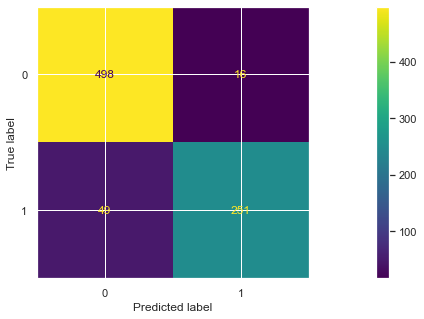

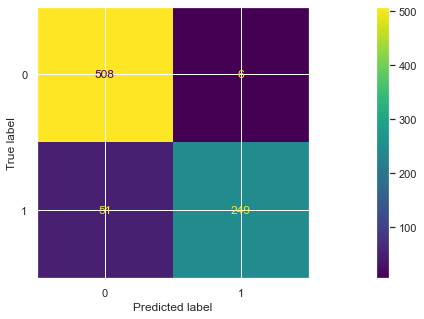

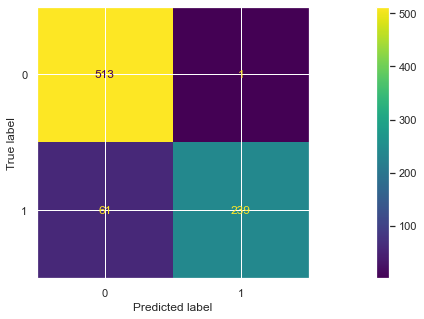

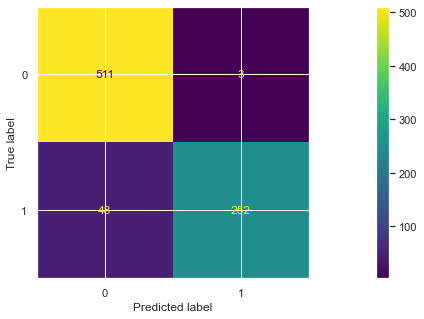

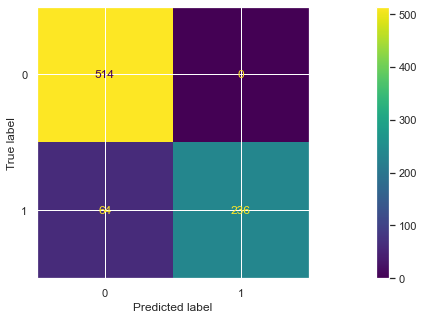

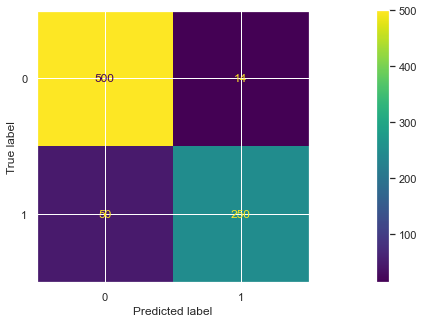

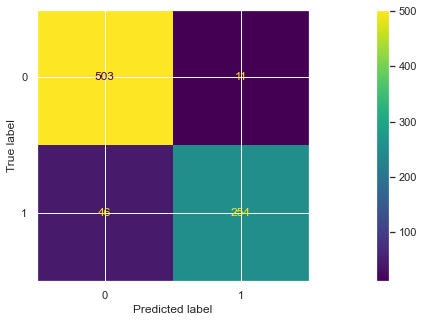

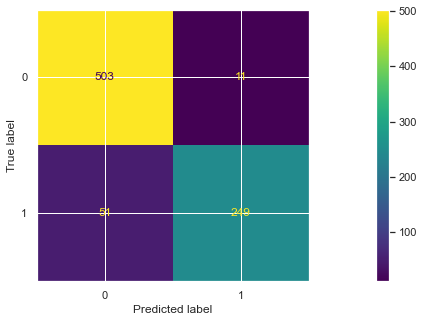

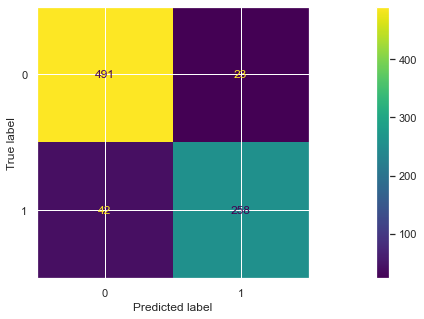

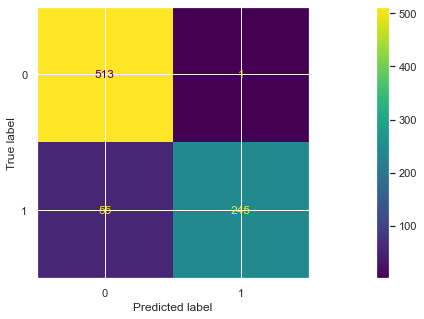

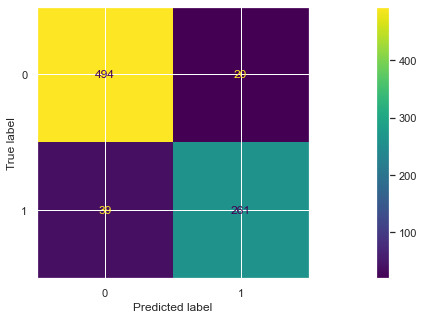

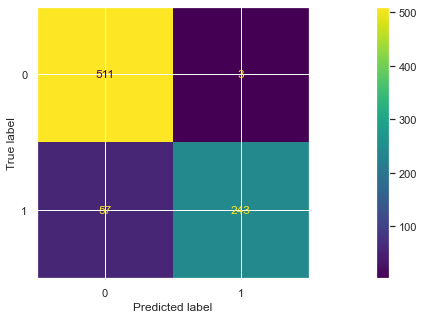

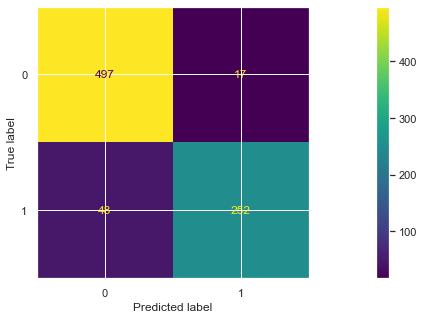

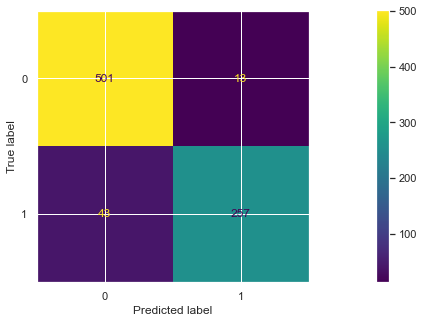

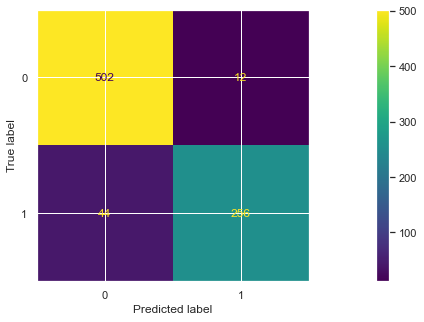

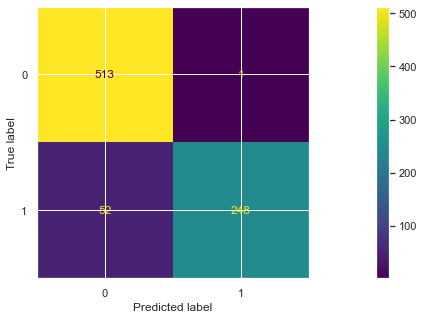

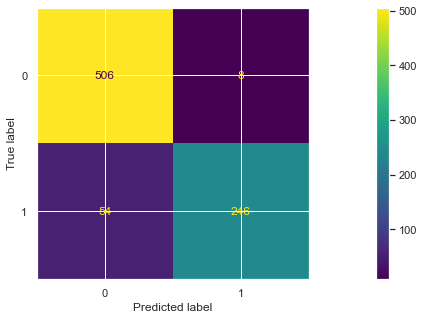

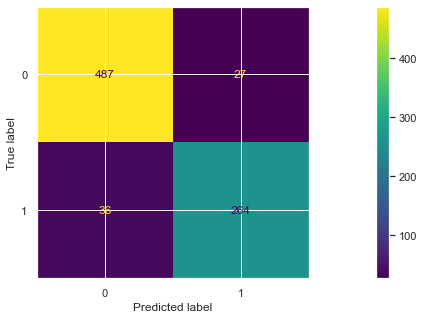

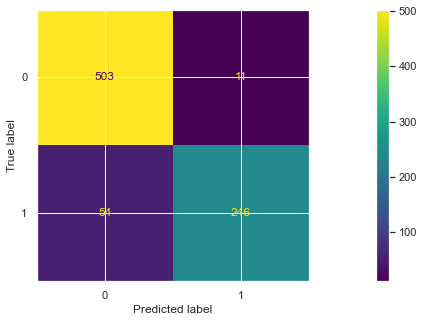

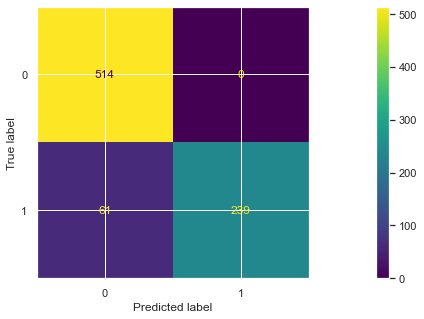

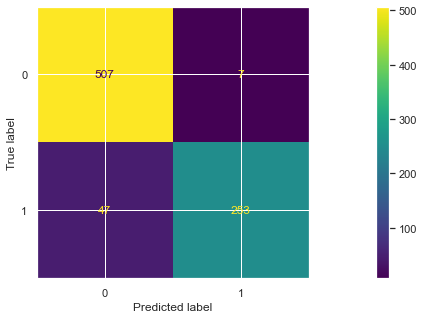

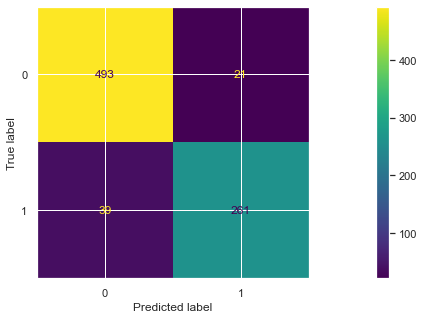

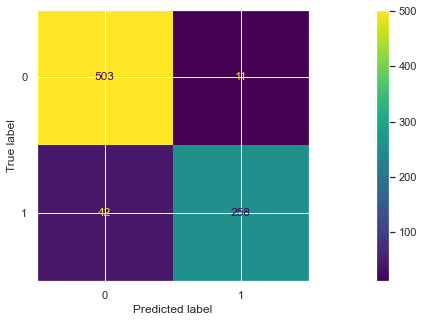

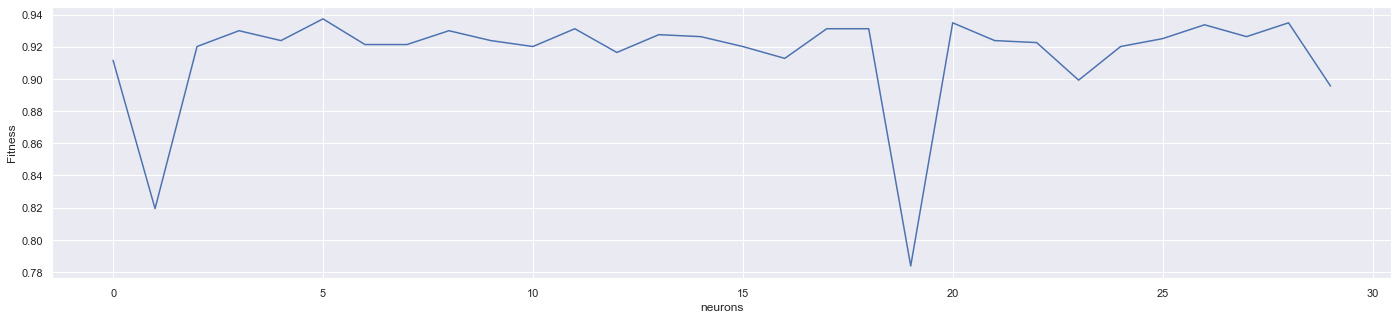

In [243]:
from tensorflow.keras import utils
from keras.utils import np_utils
from keras.utils import to_categorical
from tensorflow.keras import backend as K
##
sample_mean = mean(X_nov)
sample_std = std(X_nov)
mu1=sample_mean+0.2
mu2=sample_mean+0.3
mu3=sample_mean+0.6
mu4=sample_mean+0.7
mu5=sample_mean+0.8
mu6=sample_mean+0.9
sigma=sample_std
s1 = np.random.normal(mu1, sigma,size=(50, 3))
s2 = np.random.normal(mu2, sigma,size=(50, 3))
s3 = np.random.normal(mu3, sigma,size=(50, 3))
s4 = np.random.normal(mu4, sigma,size=(50, 3))
s5 = np.random.normal(mu5, sigma,size=(50, 3))
s6 = np.random.normal(mu6, sigma,size=(50, 3))

outlier=np.concatenate((s1,s2,s3,s4,s5,s6))

##
train =np.concatenate((X_nov, outlier))
test=train
y_train=np.concatenate((1*np.ones(X_nov.shape[0]),2*np.ones(outlier.shape[0])))
y_train=np_utils.to_categorical(y_train)
y_test=np.concatenate((1*np.ones(X_nov.shape[0]),2*np.ones(outlier.shape[0])))

score_fit2=[]

for x in range(1,31):

  model = Sequential()
  model.add(Dense(x, input_shape=(3,), activation='relu'))
  model.add(Dense(3, activation='softmax'))

# Configure the model and start training
  model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=0.6), metrics=['accuracy'])
     
  history=model.fit(train,y_train, epochs=100)
  d=history.history['accuracy']
  test_results1=model.predict_classes(test)
  conf1=confusion_matrix(y_test,test_results1)
  conf2=(conf1[0,0]+conf1[1,1])/814
  score_fit2.append(conf2)
  if score_fit2[x-1]>0.92:
   model2=model
   test_results=model2.predict_classes(test)
   conf=confusion_matrix(y_test,test_results)

   cm_display = ConfusionMatrixDisplay(conf).plot()

plt.figure()   
plt.plot(score_fit2)
plt.xlabel("neurons")
plt.ylabel("Fitness") 

Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_488 (Dense)            (None, 29)                116       
_________________________________________________________________
dense_489 (Dense)            (None, 3)                 90        
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________


C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Ghestionline.com\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

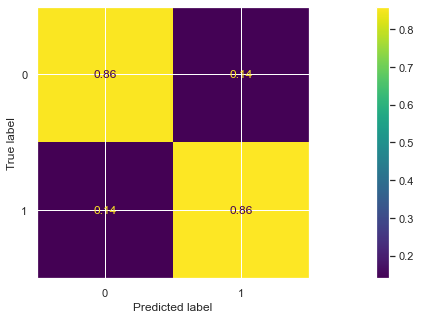

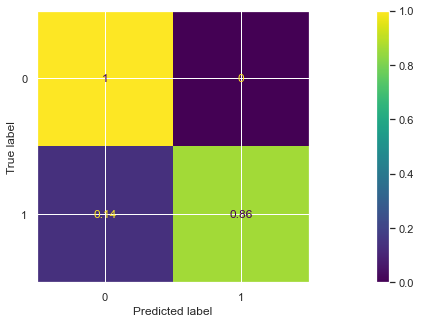

In [244]:
model2.summary()

y_train=np.concatenate((1*np.ones(len(train_genes)),2*np.ones(outlier.shape[0])))
y_test=np.concatenate((1*np.ones(len(test_genes)),2*np.ones(outlier.shape[0])))

train =np.concatenate((X_train, outlier))
test =np.concatenate((X_test, outlier))

test_results=model2.predict_classes(train)
conf=confusion_matrix(y_train,test_results,normalize='true')
cm_display = ConfusionMatrixDisplay(conf).plot()

test_results2=model2.predict_classes(test)
conf2=confusion_matrix(y_test,test_results2,normalize='true')
cm_display = ConfusionMatrixDisplay(conf2).plot()


K-MEANS:  1
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
Accuracy:  0.7886977886977887
K-MEANS:  1
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
Accuracy:  0.8746928746928747
K-MEANS:  1
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
Accuracy:  0.8857493857493858
K-MEANS:  1
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  

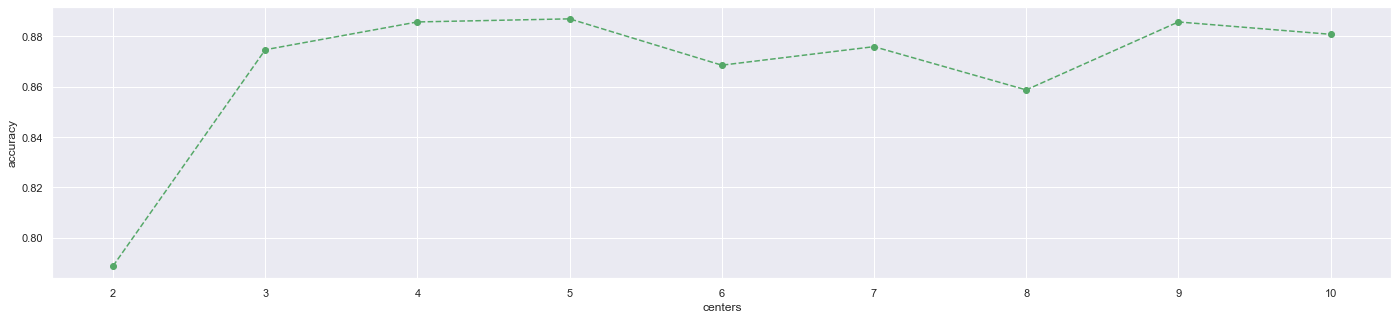

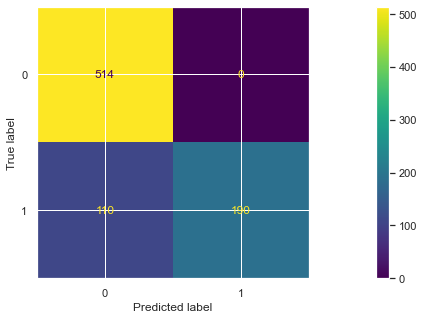

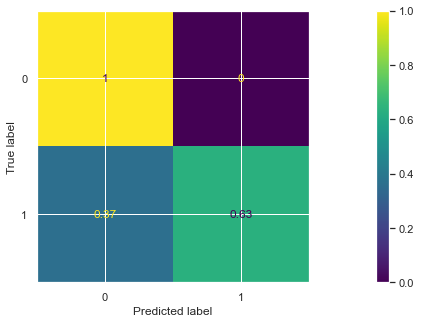

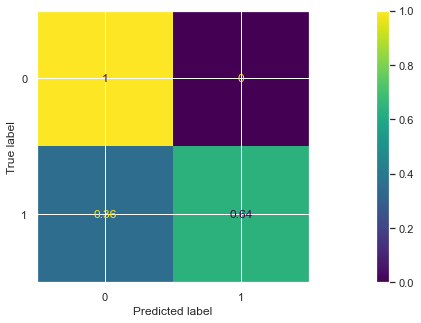

In [252]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# encode class values as integers
y_train=np.concatenate((1*np.ones(X_nov.shape[0]),2*np.ones(outlier.shape[0])))
y_test=np.concatenate((1*np.ones(X_nov.shape[0]),2*np.ones(outlier.shape[0])))
y_test2=np.concatenate((1*np.ones(X_train.shape[0]),2*np.ones(outlier.shape[0])))
y_test3=np.concatenate((1*np.ones(X_test.shape[0]),2*np.ones(outlier.shape[0])))

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)
encoded_y_test2 = encoder.transform(y_test2)
encoded_y_test3 = encoder.transform(y_test3)

X_train_rbf =np.concatenate((X_nov, outlier))
X_test_rbf=X_train_rbf
X_test_rbf2=np.concatenate((X_train, outlier))
X_test_rbf3=np.concatenate((X_test, outlier))

def get_distance(x1, x2):
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - x2[i]) ** 2
    return np.sqrt(sum)


def kmeans(X, k, max_iters):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    # centroids = [np.random.uniform(size=len(X[0])) for i in range(k)]

    converged = False
    current_iter = 0

    while (not converged) and (current_iter < max_iters):

        cluster_list = [[] for i in range(len(centroids))]

        for x in X:  # Go through each data point
            distances_list = []
            for c in centroids:
                distances_list.append(get_distance(c, x))
            cluster_list[int(np.argmin(distances_list))].append(x)

        cluster_list = list((filter(None, cluster_list)))

        prev_centroids = centroids.copy()

        centroids = []

        for j in range(len(cluster_list)):
            centroids.append(np.mean(cluster_list[j], axis=0))

        pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))

        print('K-MEANS: ', int(pattern))

        converged = (pattern == 0)

        current_iter += 1

    return np.array(centroids), [np.std(x) for x in cluster_list]


class RBF:

    def __init__(self, X, y, tX, ty, num_of_classes,
                 k, std_from_clusters=True):
        self.X = X
        self.y = y

        self.tX = tX
        self.ty = ty

        self.number_of_classes = num_of_classes
        self.k = k
        self.std_from_clusters = std_from_clusters

    def convert_to_one_hot(self, x, num_of_classes):
        arr = np.zeros((len(x), num_of_classes))
        for i in range(len(x)):
            c = int(x[i])
            arr[i][c] = 1
        return arr

    def get_rbf(self, x, c, s):
        distance = get_distance(x, c)
        return 1 / np.exp(-distance / s ** 2)

    def get_rbf_as_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.get_rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)

    def fit(self):

        self.centroids, self.std_list = kmeans(self.X, self.k, 1000)

        if not self.std_from_clusters:
            dMax = np.max([get_distance(c1, c2) for c1 in self.centroids for c2 in self.centroids])
            self.std_list = np.repeat(dMax / np.sqrt(2 * self.k), self.k)

        RBF_X = self.get_rbf_as_list(self.X, self.centroids, self.std_list)

        self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.convert_to_one_hot(self.y, self.number_of_classes)

        RBF_list_tst = self.get_rbf_as_list(self.tX, self.centroids, self.std_list)

        self.pred_ty = RBF_list_tst @ self.w

        self.pred_ty = np.array([np.argmax(x) for x in self.pred_ty])

        diff = self.pred_ty - self.ty

        accuracy = len(np.where(diff == 0)[0]) / len(diff)
        print('Accuracy: ', accuracy)
        
        return self.pred_ty, accuracy, self.centroids
    
n_centers=[k+2 for k in range(9)]
accuracy = np.empty(len(n_centers))
score=[]
for k in range(9):
  RBF_CLASSIFIER = RBF(X_train_rbf, encoded_y_train, X_test_rbf, encoded_y_test, num_of_classes=2,
                     k=k+2, std_from_clusters=False)
   
  y_pred, accuracy[k],centroids = RBF_CLASSIFIER.fit()
  score.append(accuracy[k])
  if score[k]>0.885:
    k1=k
#    conf=confusion_matrix(encoded_y_test, y_pred)
#    cm_display = ConfusionMatrixDisplay(conf).plot()

plt.figure()       
plt.plot(n_centers, accuracy, 'go--')
plt.xlabel("centers")
plt.ylabel("accuracy") 
##
RBF_CLASSIFIER = RBF(X_train_rbf, encoded_y_train, X_test_rbf, encoded_y_test, num_of_classes=2,
                     k=k1, std_from_clusters=False)

y_pred, accuracy, centroids = RBF_CLASSIFIER.fit()

centroids
conf=confusion_matrix(encoded_y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf).plot()
##
RBF_CLASSIFIER = RBF(X_train_rbf, encoded_y_train, X_test_rbf2, encoded_y_test2, num_of_classes=2,
                     k=k1, std_from_clusters=False)

y_pred, accuracy, centroids = RBF_CLASSIFIER.fit()

centroids
conf=confusion_matrix(encoded_y_test2, y_pred,normalize='true')
cm_display = ConfusionMatrixDisplay(conf).plot()
##
RBF_CLASSIFIER = RBF(X_train_rbf, encoded_y_train, X_test_rbf3, encoded_y_test3, num_of_classes=2,
                     k=k1, std_from_clusters=False)

y_pred, accuracy, centroids = RBF_CLASSIFIER.fit()

centroids
conf=confusion_matrix(encoded_y_test3, y_pred,normalize='true')
cm_display = ConfusionMatrixDisplay(conf).plot()


In [253]:
print(k1)
X_candd=encoder1.predict(X_cand)
encoded_y_cand=np.concatenate((1*np.ones(X_cand.shape[0]),2*np.ones(outlier.shape[0])))
encoded_y_cand= encoder.transform(encoded_y_cand)
X_candd=np.concatenate((X_candd, outlier))
RBF_CLASSIFIER = RBF(X_train_rbf, encoded_y_train, X_candd, encoded_y_cand, num_of_classes=2,
                     k=k1, std_from_clusters=False)

y_pred, accuracy, centroids = RBF_CLASSIFIER.fit()

confusion_matrix(encoded_y_cand, y_pred)  ##satr aval:number of candidate in RBF 

7
K-MEANS:  4
K-MEANS:  1
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
Accuracy:  0.9756042972247091


array([[4168,    0],
       [ 109,  191]], dtype=int64)